# 3. Classification

---

### Setup

In [1]:
import sys
sys.path.insert(1, '../utils')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ds_functions as ds
from sklearn.model_selection import StratifiedKFold

data: pd.DataFrame = pd.read_csv('heart_failure_clinical_records_dataset_after_preparation.csv', sep=';')

## 3.0. Training Models

---

### Training Models

---

#### StratifiedKFold function
After loading the data, in data dataframe, we need to separate the target variable which is the DEATH_EVENT from the rest of the data, since it plays a different role in the training procedure. Through the application of the pop method, we get the class variable, and simultaneously removing it from the dataframe. So, y will keep the ndarray with the target variable for each record and X the ndarray containing the records themselves

In [2]:
target = 'DEATH_EVENT'
positive = True
negative = False
values = {'Original': [len(data[data[target] == positive]), len(data[data[target] == negative])]}

y: np.ndarray = data.pop(target).values
X: np.ndarray = data.values
labels: np.ndarray = pd.unique(y)

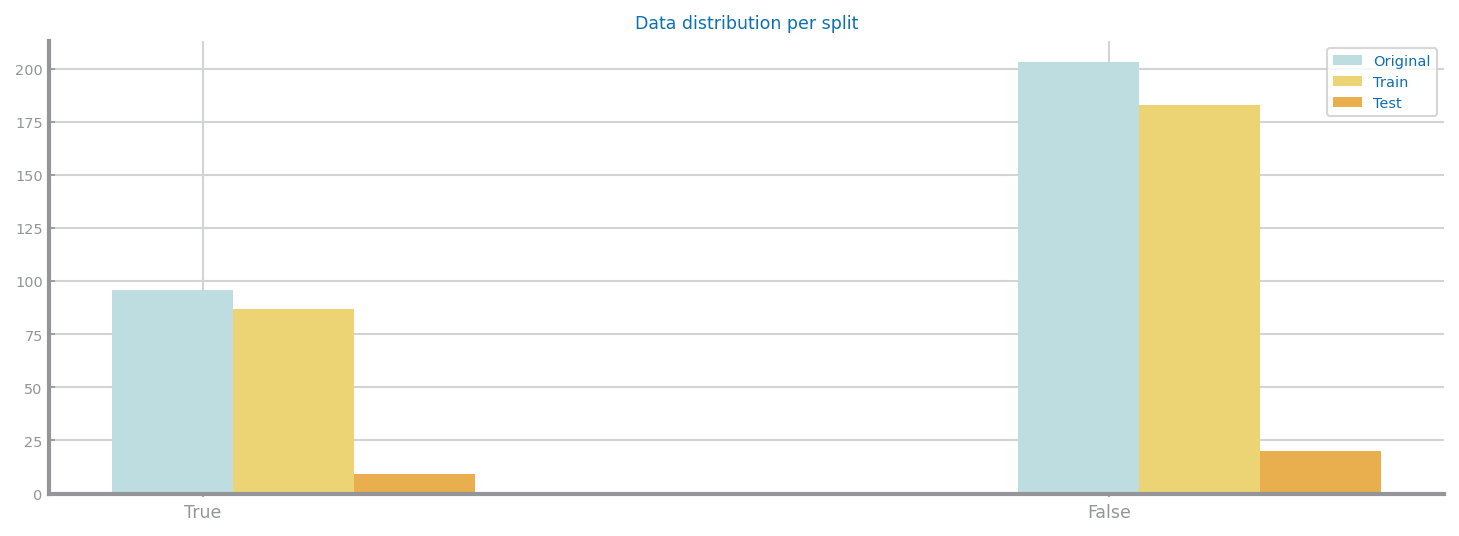

In [3]:
skf = StratifiedKFold(n_splits=10, shuffle=True)
skf.get_n_splits(X, y)

splits=[]

for train_index, test_index in skf.split(X, y):
    splits.append({'X_train': X[train_index], 'X_test': X[test_index],
                  'y_train': y[train_index], 'y_test': y[test_index]})

values['Train'] = [len(np.delete(y[train_index], np.argwhere(y[train_index]==negative))), len(np.delete(y[train_index], np.argwhere(y[train_index]==positive)))]
values['Test'] = [len(np.delete(y[test_index], np.argwhere(y[test_index]==negative))), len(np.delete(y[test_index], np.argwhere(y[test_index]==positive)))]

plt.figure(figsize=(12,4))
ds.multiple_bar_chart([positive, negative], values, title='Data distribution per split', showXTickLabels=True)
plt.show()

We have just plotted the chart of one split because the splits have identical distribution which will make the bar charts equal.

### Evaluation

---

#### Accuracy
The simplest measure is accuracy, which reports the percentage of correct predictions. It is just the opposite of error. In sklearn, accuracy is reported through the score method from each classifier, after its training and measured over a particular dataset and its known labels.

In [4]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
for split in splits:
    clf.fit(split['X_train'], split['y_train'])
    print(clf.score(split['X_test'], split['y_test']))

0.7666666666666667
0.7333333333333333
0.7666666666666667
0.8
0.7333333333333333
0.7
0.7333333333333333
0.9
0.8333333333333334
0.7241379310344828


In our example we can see that naive Bayes is better with some splits than others.

#### Confusion Matrix
The simplest measure is accuracy, which reports the percentage of correct predictions. It is just the opposite of error. In sklearn, accuracy is reported through the score method from each classifier, after its training and measured over a particular dataset and its known labels.

In [5]:
import sklearn.metrics as metrics

labels: np.ndarray = [False, True]#pd.unique(y)
    
for split in splits:
    prdY: np.ndarray = clf.predict(split['X_test'])
    cnf_mtx: np.ndarray = metrics.confusion_matrix(split['y_test'], prdY, labels)
    split['prdY'] = prdY
    split['cnf_mtx'] = cnf_mtx
    print(cnf_mtx)
    print('Accuracy if it classifies everything as negative:\n', sum(cnf_mtx[0]) / sum(cnf_mtx[0] + cnf_mtx[1]))

[[18  2]
 [ 4  6]]
Accuracy if it classifies everything as negative:
 0.6666666666666666
[[17  3]
 [ 7  3]]
Accuracy if it classifies everything as negative:
 0.6666666666666666
[[19  1]
 [ 5  5]]
Accuracy if it classifies everything as negative:
 0.6666666666666666
[[20  0]
 [ 5  5]]
Accuracy if it classifies everything as negative:
 0.6666666666666666
[[18  2]
 [ 6  4]]
Accuracy if it classifies everything as negative:
 0.6666666666666666
[[18  2]
 [ 5  5]]
Accuracy if it classifies everything as negative:
 0.6666666666666666
[[19  2]
 [ 5  4]]
Accuracy if it classifies everything as negative:
 0.7
[[19  2]
 [ 3  6]]
Accuracy if it classifies everything as negative:
 0.7
[[20  1]
 [ 4  5]]
Accuracy if it classifies everything as negative:
 0.7
[[18  2]
 [ 6  3]]
Accuracy if it classifies everything as negative:
 0.6896551724137931


<Figure size 600x450 with 0 Axes>

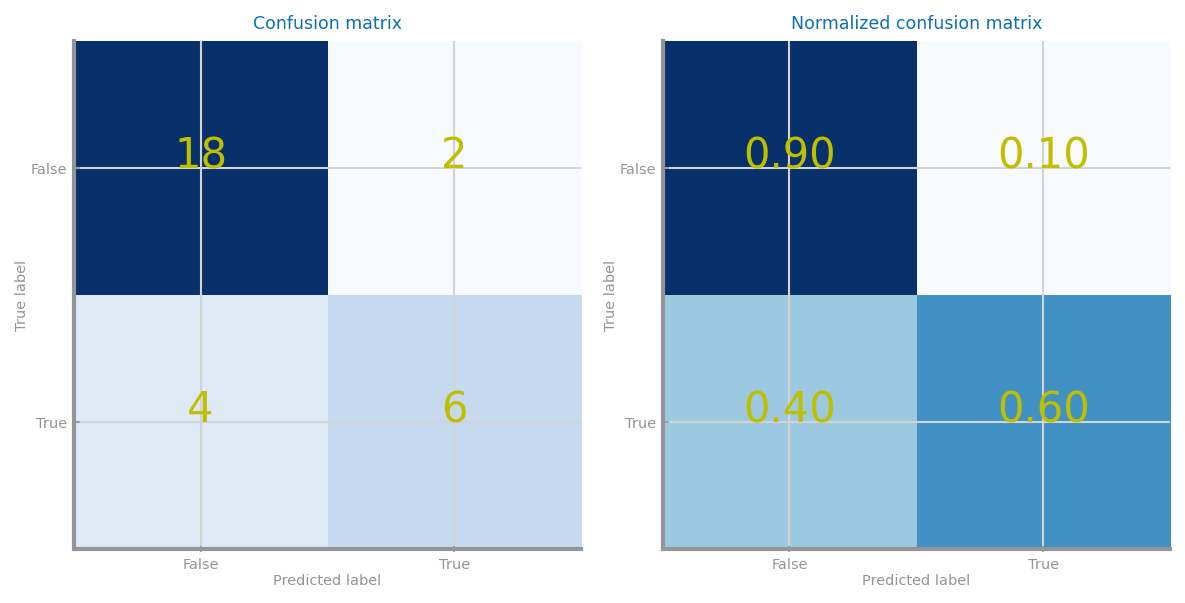

<Figure size 600x450 with 0 Axes>

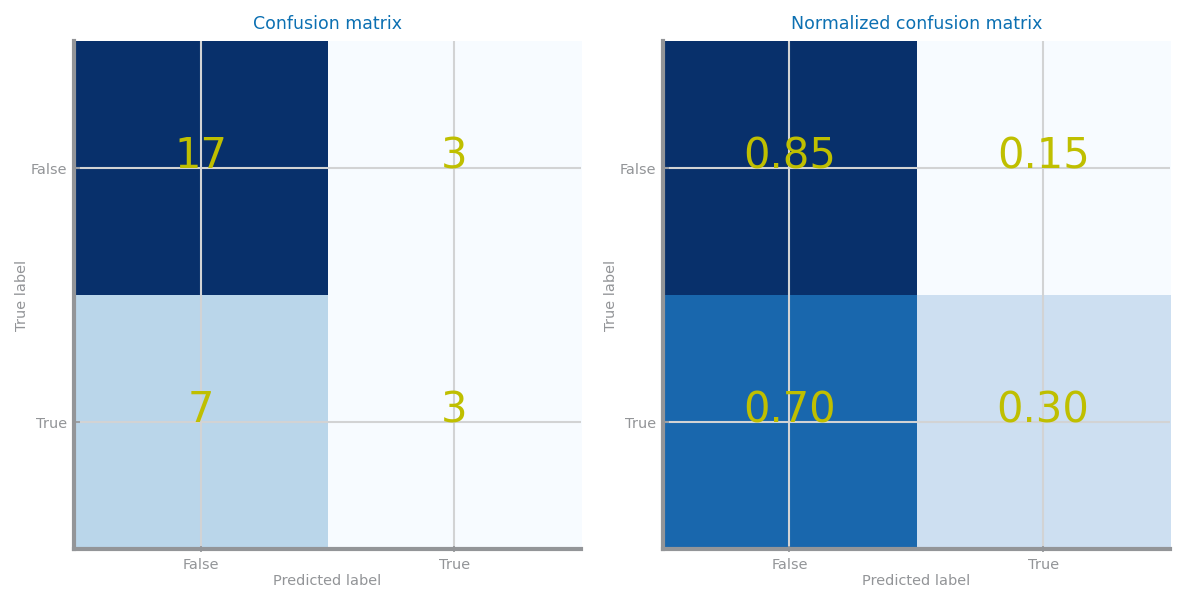

<Figure size 600x450 with 0 Axes>

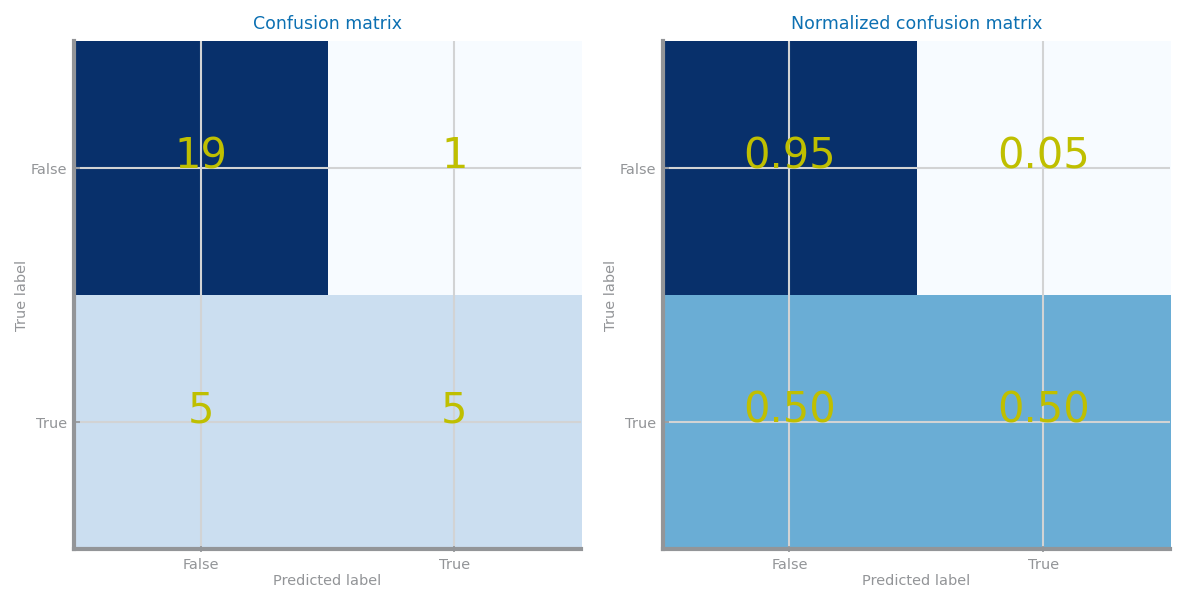

<Figure size 600x450 with 0 Axes>

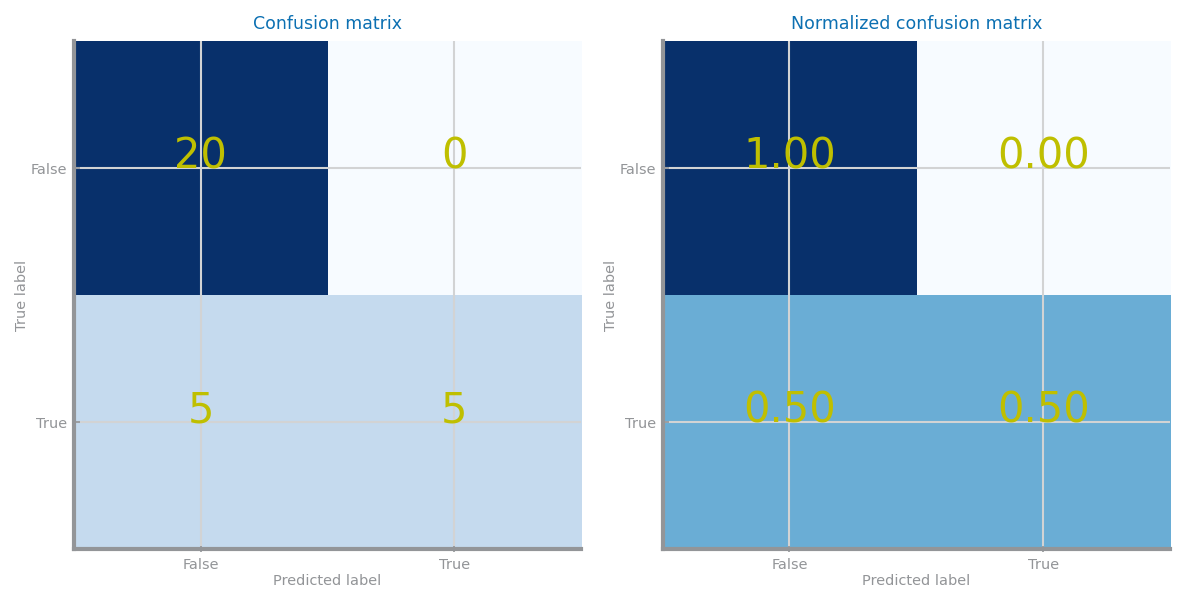

<Figure size 600x450 with 0 Axes>

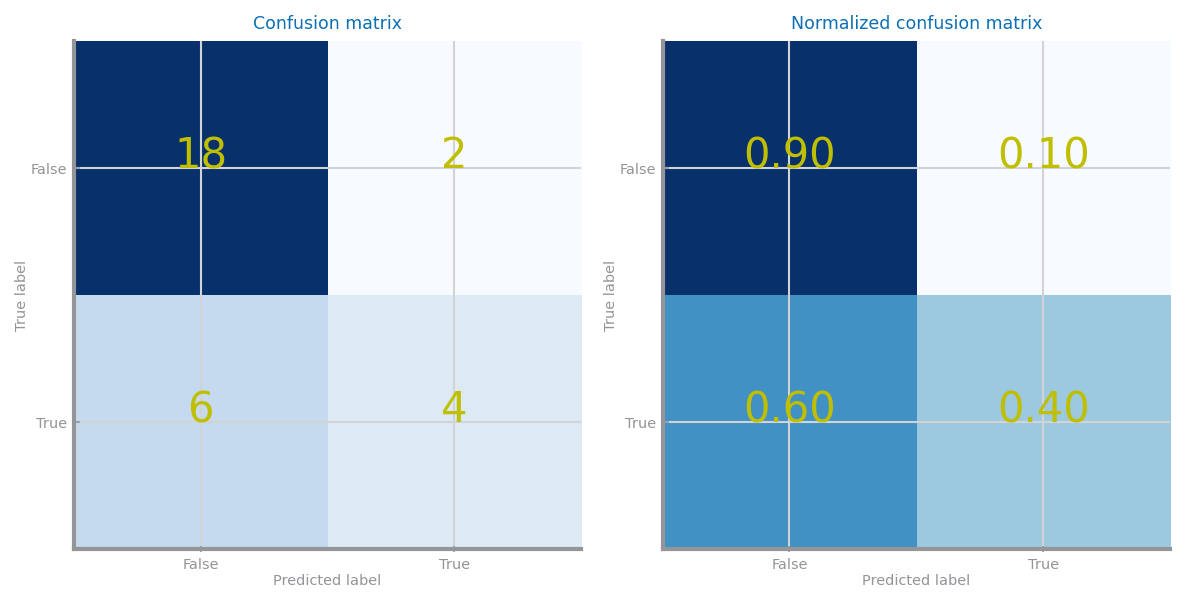

<Figure size 600x450 with 0 Axes>

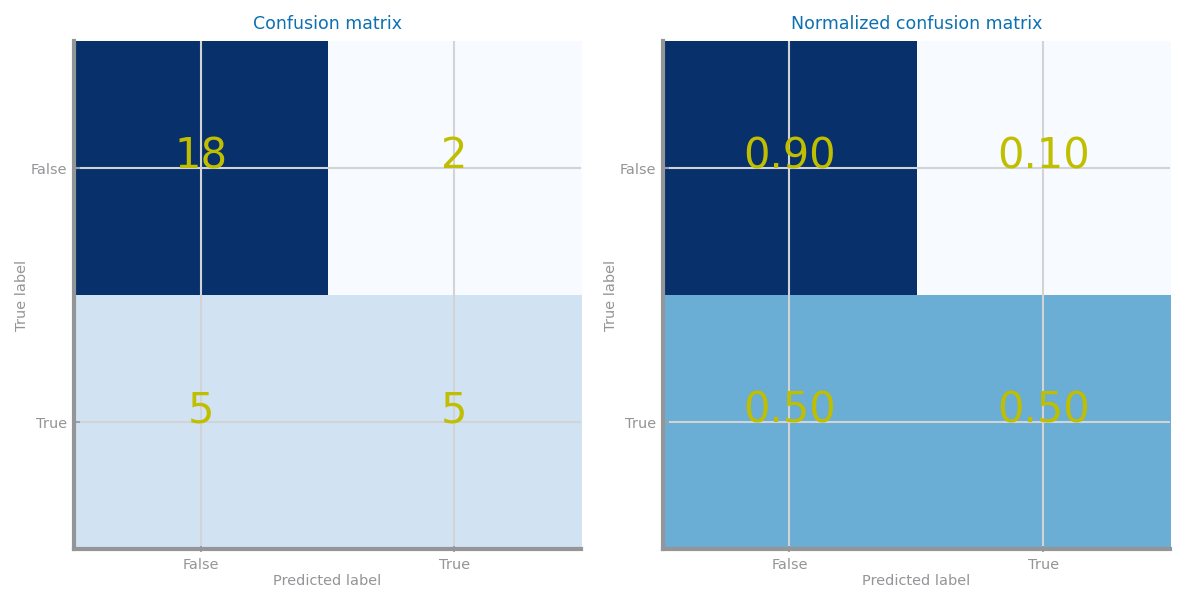

<Figure size 600x450 with 0 Axes>

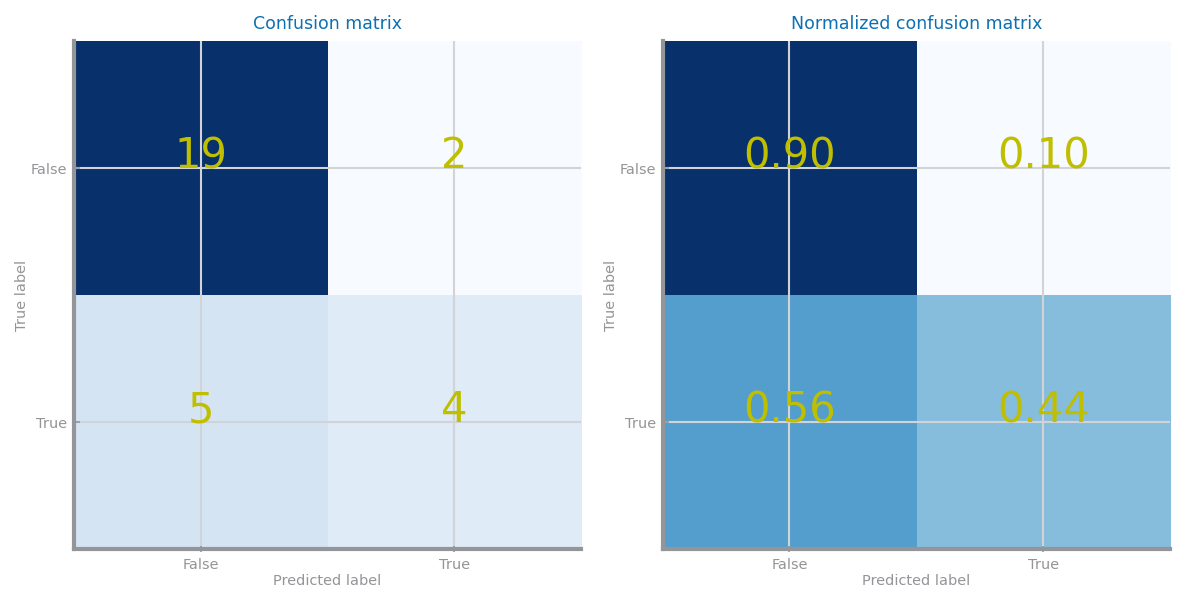

<Figure size 600x450 with 0 Axes>

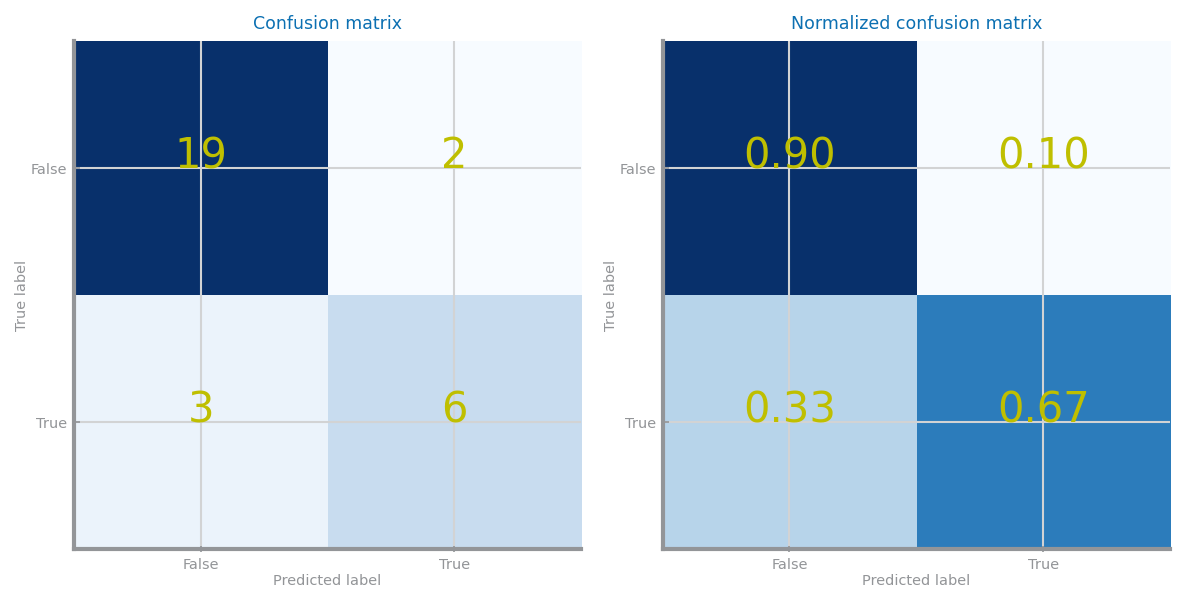

<Figure size 600x450 with 0 Axes>

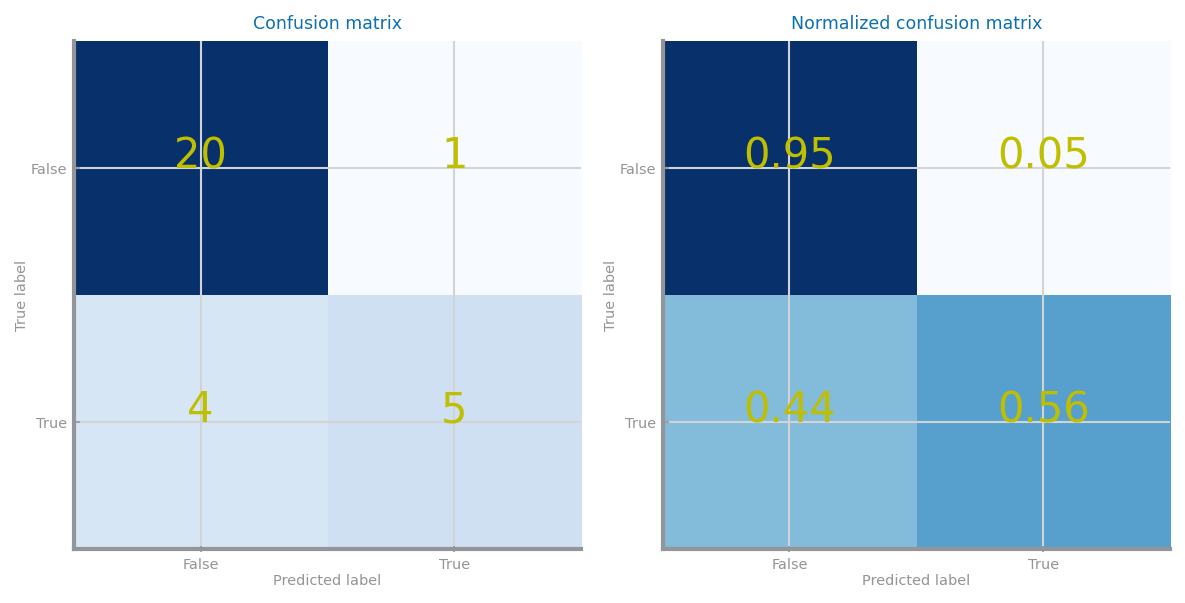

<Figure size 600x450 with 0 Axes>

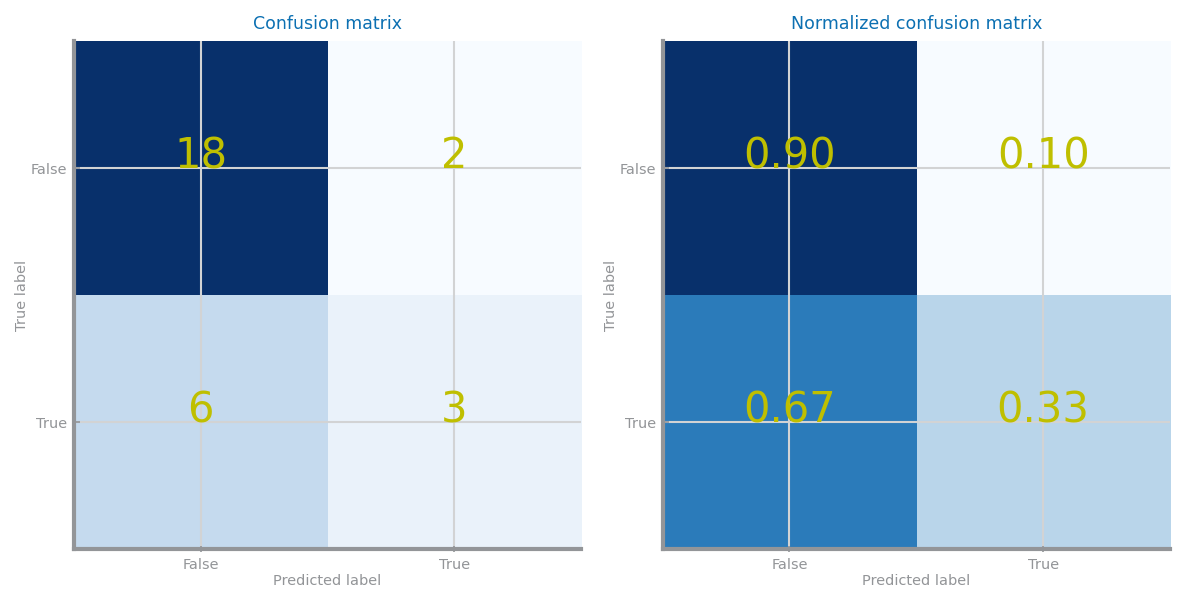

In [6]:
import itertools
import matplotlib.pyplot as plt
CMAP = plt.cm.Blues

def plot_confusion_matrix(cnf_matrix: np.ndarray, classes_names: np.ndarray, ax: plt.Axes = None,
                          normalize: bool = False):
    if ax is None:
        ax = plt.gca()
    if normalize:
        total = cnf_matrix.sum(axis=1)[:, np.newaxis]
        cm = cnf_matrix.astype('float') / total
        title = "Normalized confusion matrix"
    else:
        cm = cnf_matrix
        title = 'Confusion matrix'
    np.set_printoptions(precision=2)
    tick_marks = np.arange(0, len(classes_names), 1)
    ax.set_title(title)
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes_names)
    ax.set_yticklabels(classes_names)
    ax.imshow(cm, interpolation='nearest', cmap=CMAP)

    fmt = '.2f' if normalize else 'd'
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, format(cm[i, j], fmt), color='y', horizontalalignment="center", size=20)

for split in splits:
    plt.figure()
    fig, axs = plt.subplots(1, 2, figsize=(8, 4), squeeze=False)
    plot_confusion_matrix(split['cnf_mtx'], labels, ax=axs[0,0])
    plot_confusion_matrix(metrics.confusion_matrix(split['y_test'], split['prdY'], labels), labels, axs[0,1], normalize=True)
    plt.tight_layout()
    plt.show()

#### Classification metrics

In [7]:
for split in splits:
    print('Recall Score: ', metrics.recall_score(split['y_test'], split['prdY']))
    print('Precision Score: ', metrics.precision_score(split['y_test'], split['prdY']))
    print('F1 Score: ', metrics.f1_score(split['y_test'], split['prdY']))
    print('Balanced Accuracy Score: ', metrics.balanced_accuracy_score(split['y_test'], split['prdY']))
    print('----')

Recall Score:  0.6
Precision Score:  0.75
F1 Score:  0.6666666666666665
Balanced Accuracy Score:  0.75
----
Recall Score:  0.3
Precision Score:  0.5
F1 Score:  0.37499999999999994
Balanced Accuracy Score:  0.575
----
Recall Score:  0.5
Precision Score:  0.8333333333333334
F1 Score:  0.625
Balanced Accuracy Score:  0.725
----
Recall Score:  0.5
Precision Score:  1.0
F1 Score:  0.6666666666666666
Balanced Accuracy Score:  0.75
----
Recall Score:  0.4
Precision Score:  0.6666666666666666
F1 Score:  0.5
Balanced Accuracy Score:  0.65
----
Recall Score:  0.5
Precision Score:  0.7142857142857143
F1 Score:  0.588235294117647
Balanced Accuracy Score:  0.7
----
Recall Score:  0.4444444444444444
Precision Score:  0.6666666666666666
F1 Score:  0.5333333333333333
Balanced Accuracy Score:  0.6746031746031746
----
Recall Score:  0.6666666666666666
Precision Score:  0.75
F1 Score:  0.7058823529411765
Balanced Accuracy Score:  0.7857142857142857
----
Recall Score:  0.5555555555555556
Precision Score: 

## 3.1. Naive Bayes

---

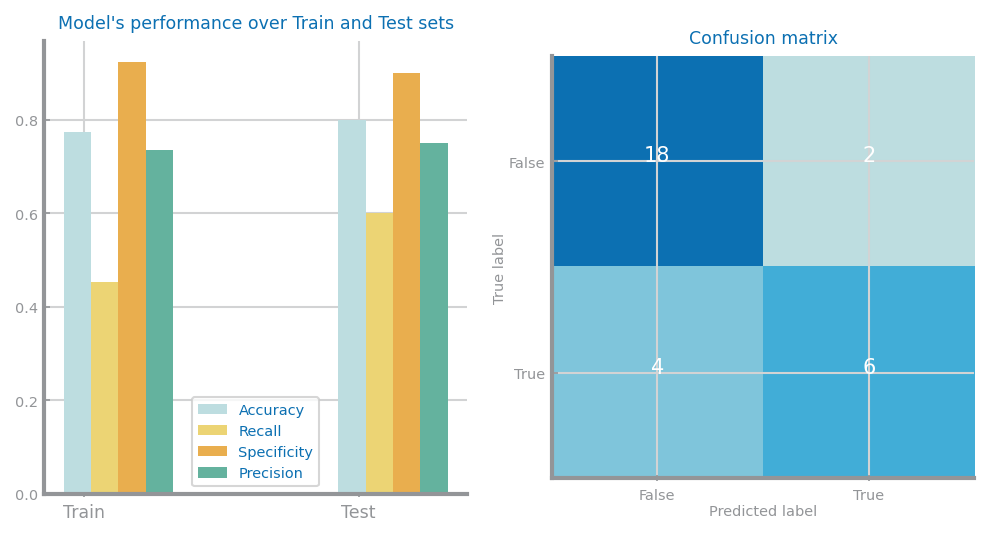

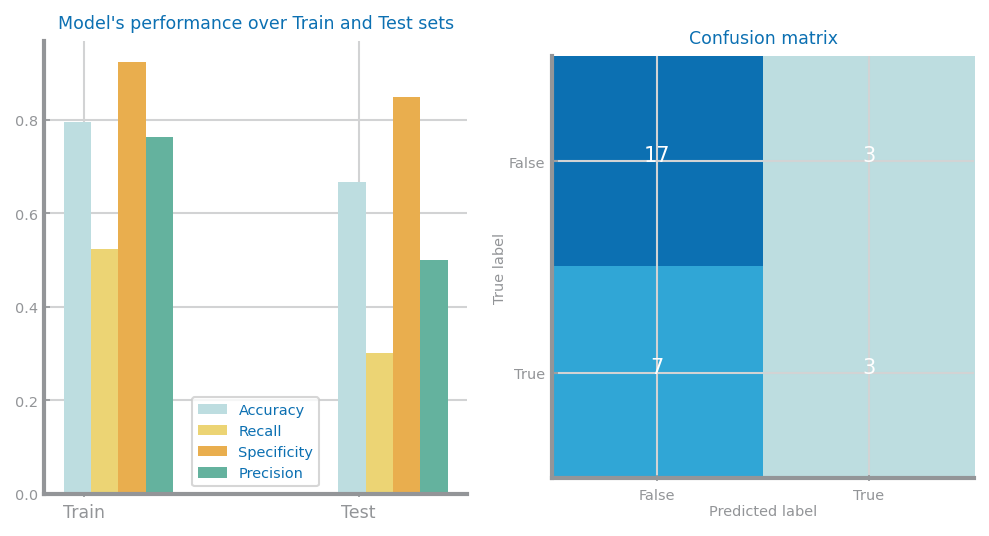

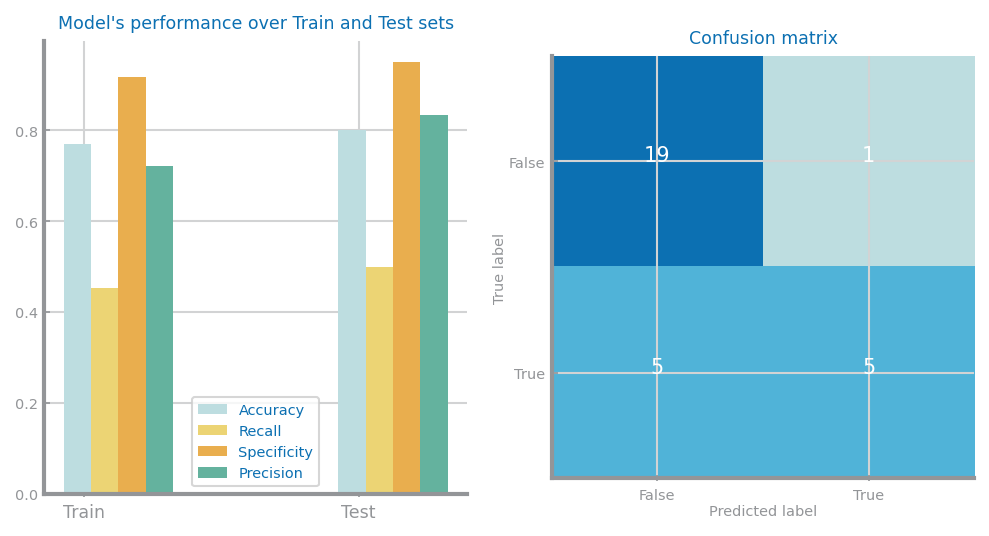

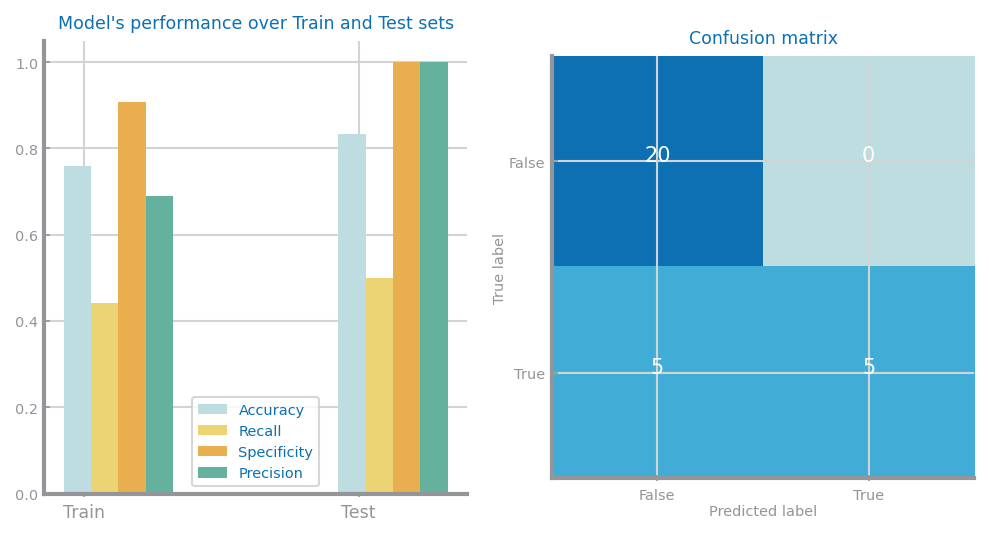

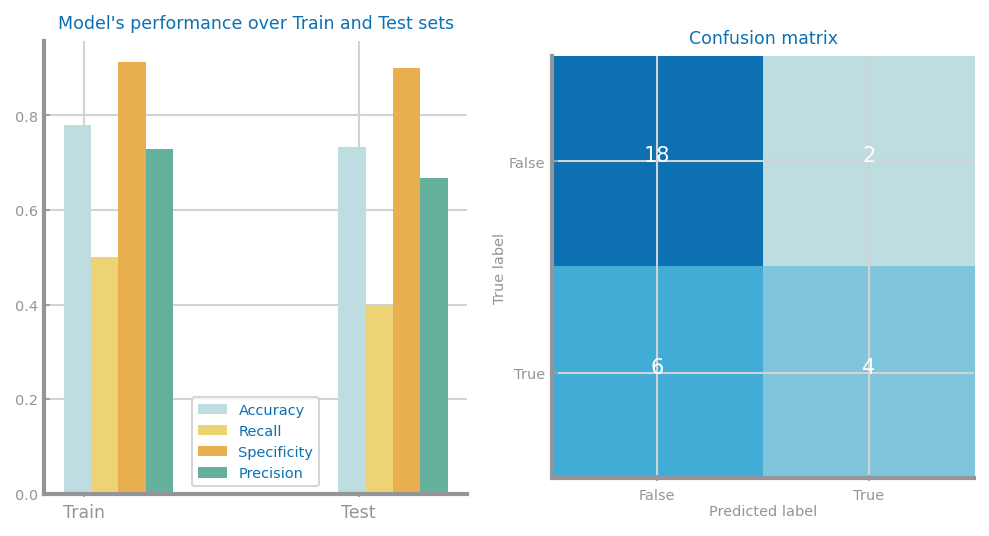

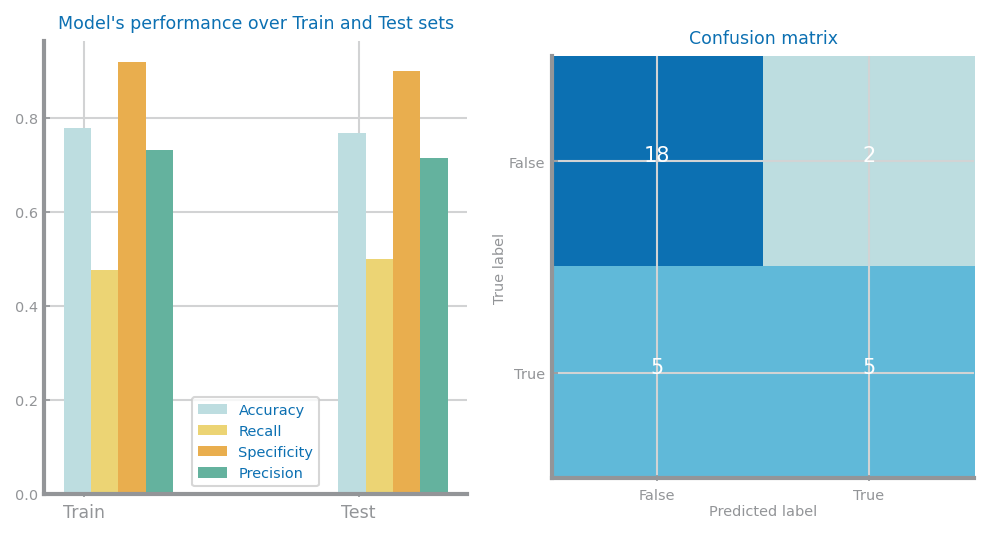

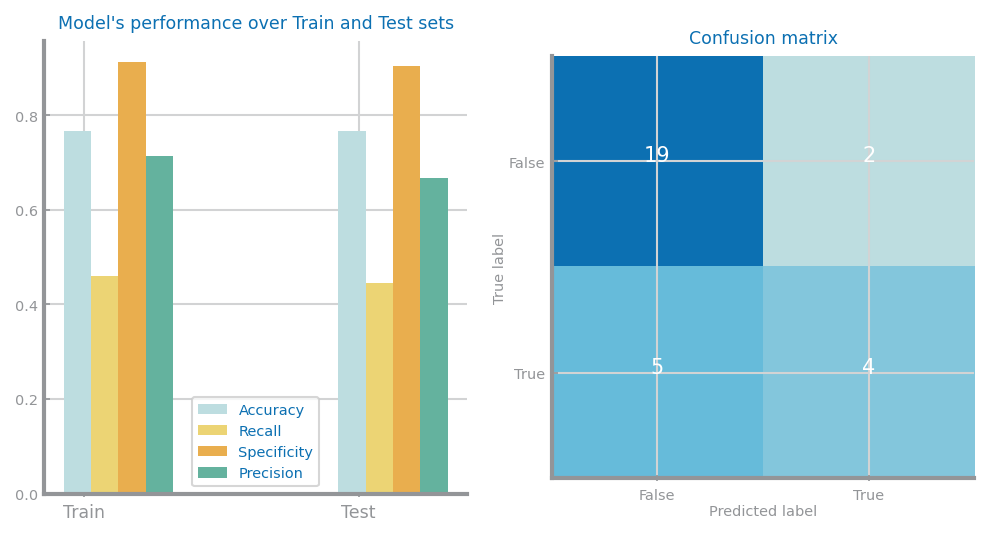

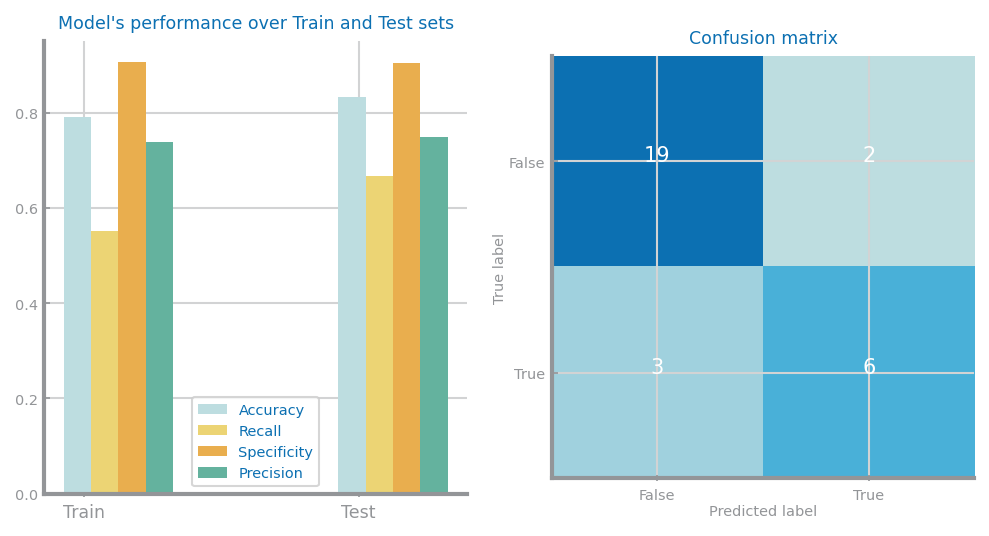

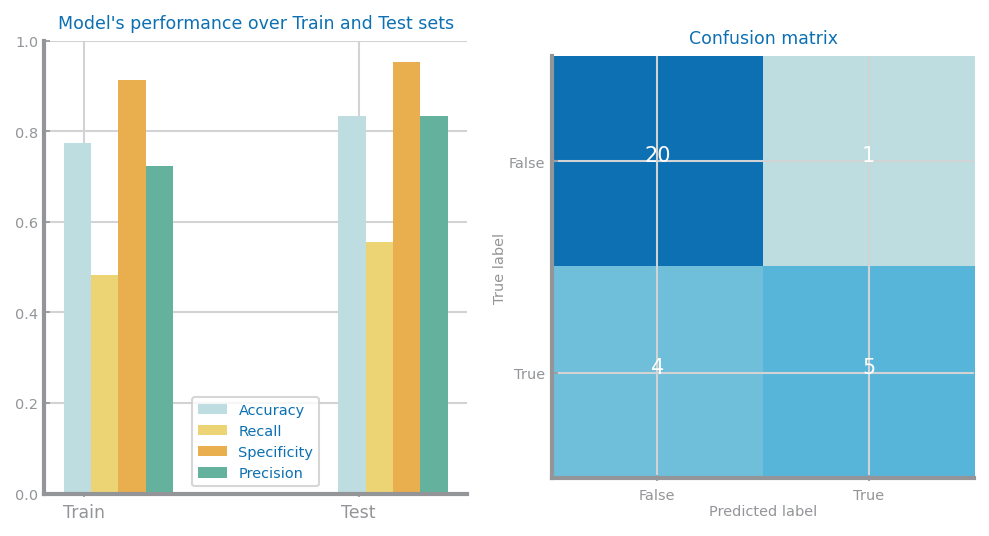

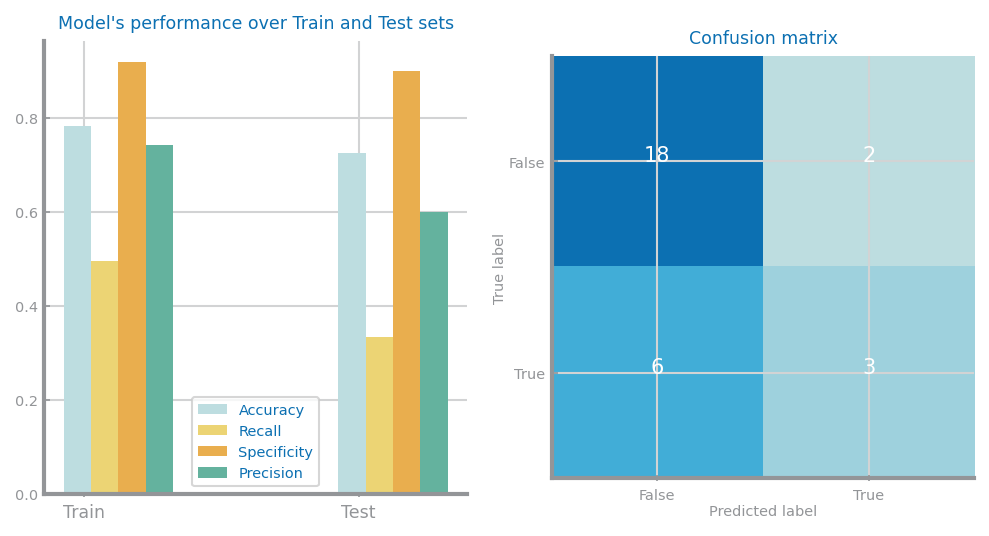

In [8]:
import sklearn.metrics as metrics
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

for split in splits:
    clf.fit(split['X_train'], split['y_train'])
    prd_trn = clf.predict(split['X_train'])
    prd_tst = split['prdY']
    ds.plot_evaluation_results([False, True], split['y_train'], prd_trn, split['y_test'], prd_tst, showXTickLabels=True)

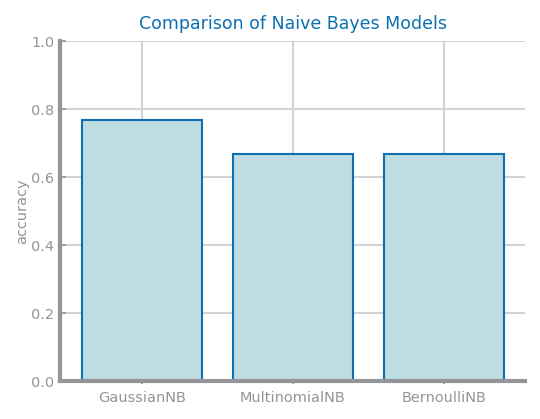

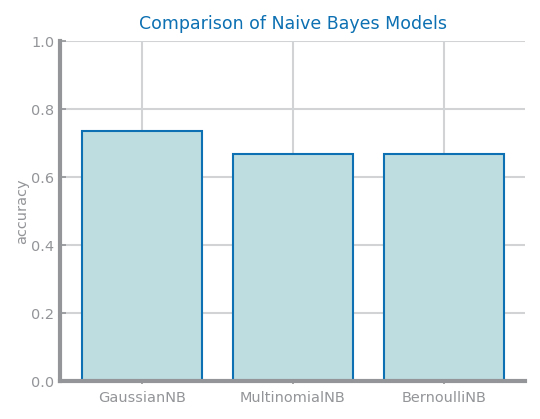

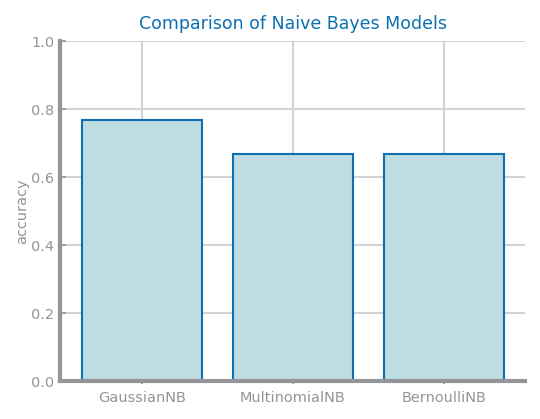

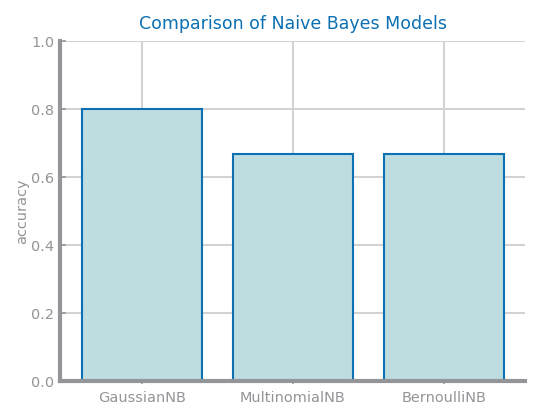

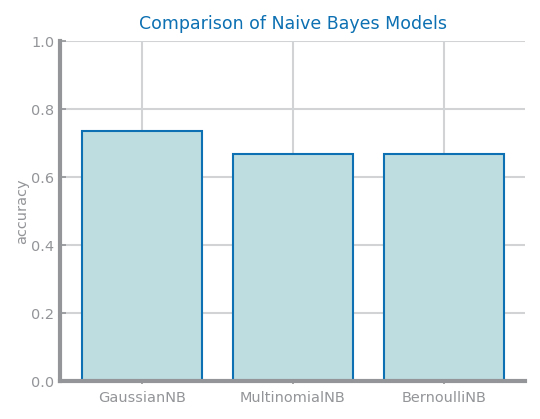

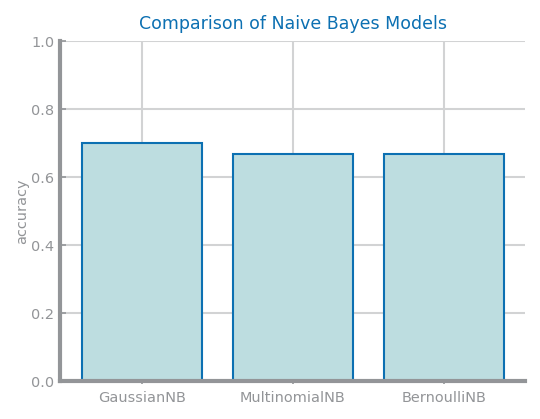

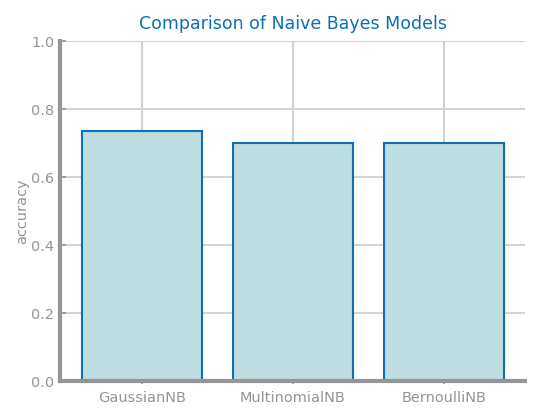

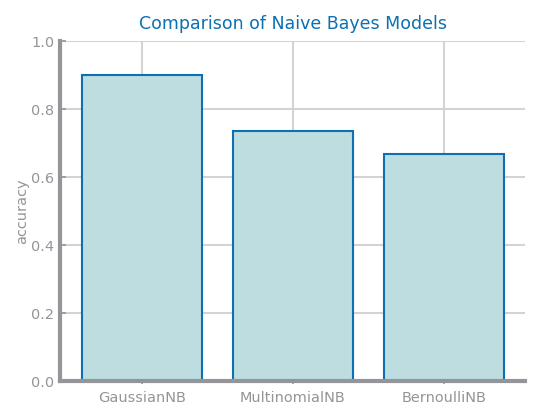

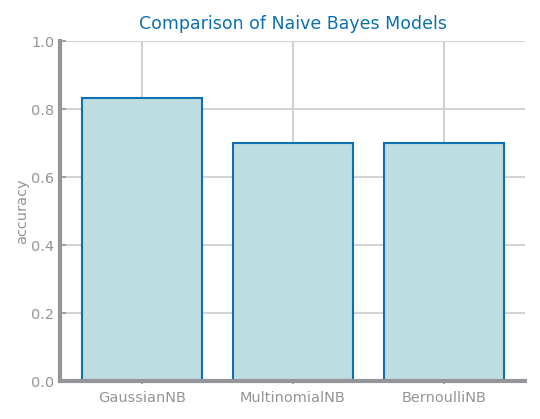

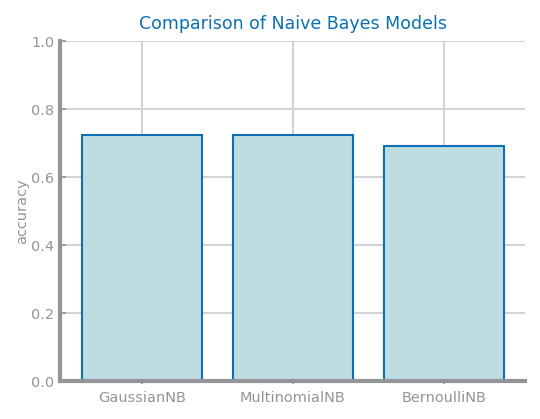

In [9]:
for split in splits:
    estimators = {'GaussianNB': GaussianNB(),
              'MultinomialNB': MultinomialNB(),
              'BernoulliNB': BernoulliNB()}

    xvalues = []
    yvalues = []
    for clf in estimators:
        xvalues.append(clf)
        estimators[clf].fit(split['X_train'], split['y_train'])
        prdY = estimators[clf].predict(split['X_test'])
        yvalues.append(metrics.accuracy_score(split['y_test'], prdY))

    plt.figure()
    ds.bar_chart(xvalues, yvalues, title='Comparison of Naive Bayes Models', ylabel='accuracy', percentage=True)
    plt.show()

### Summary

---

***Which distribution is more adequate to model our data?***

For most of the splits, the Gaussian distribution models better our data.

***Is the accuracy achieved good enough?***

The accuracy is better than the one of the classifier that considers every record is negative. However, this doesn't mean the classifier is good enough. We still consider it is not very good.

***What is the largest kind of errors?***

False negatives.

## 3.2. KNN

---

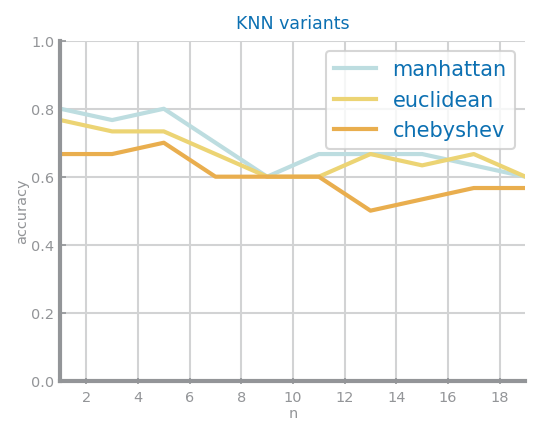

Best accuracy: 0.8
Best results with 1 neighbors and manhattan


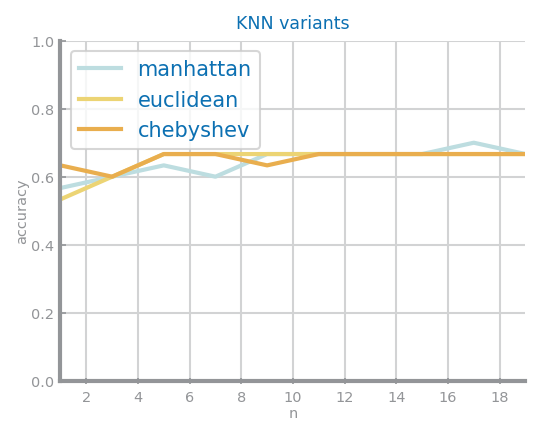

Best accuracy: 0.7
Best results with 17 neighbors and manhattan


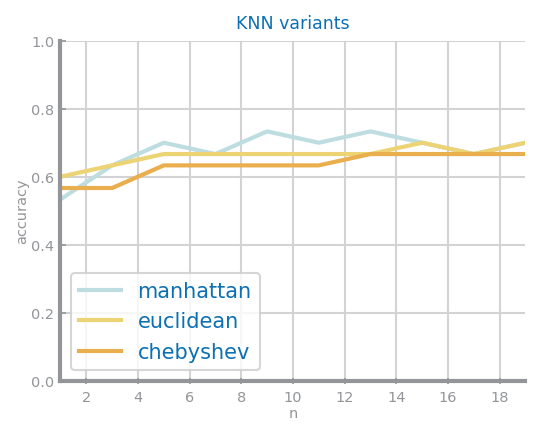

Best accuracy: 0.7333333333333333
Best results with 9 neighbors and manhattan


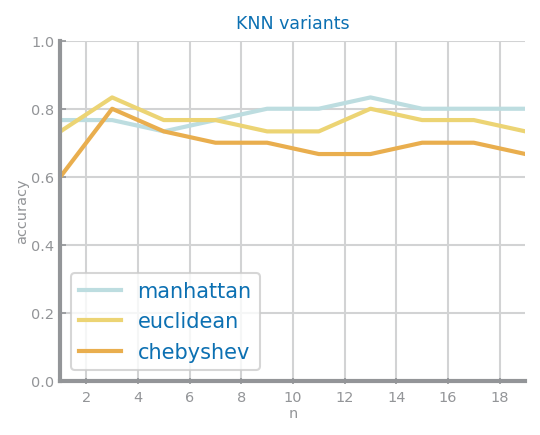

Best accuracy: 0.8333333333333334
Best results with 13 neighbors and manhattan


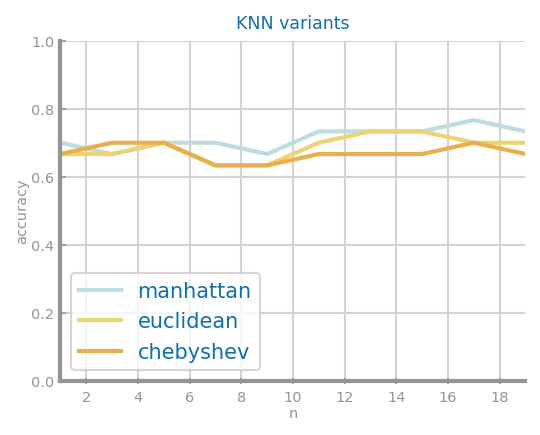

Best accuracy: 0.7666666666666667
Best results with 17 neighbors and manhattan


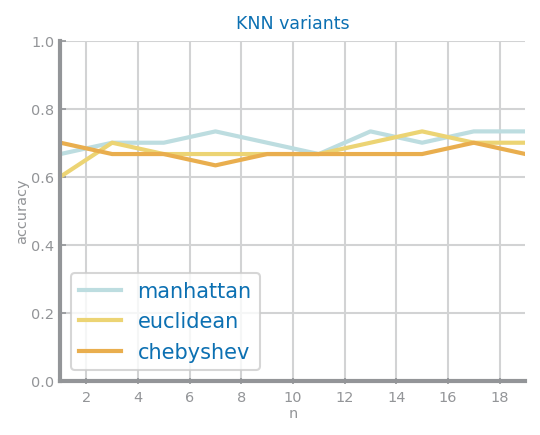

Best accuracy: 0.7333333333333333
Best results with 7 neighbors and manhattan


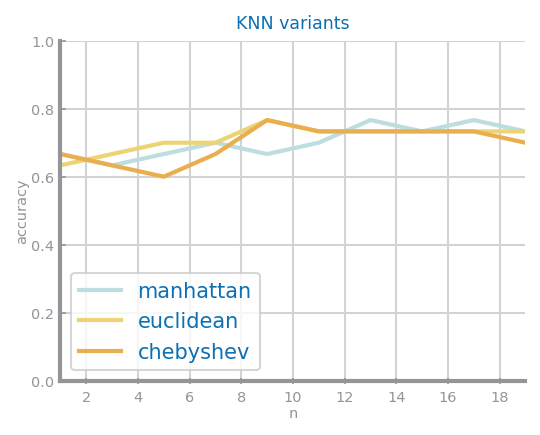

Best accuracy: 0.7666666666666667
Best results with 13 neighbors and manhattan


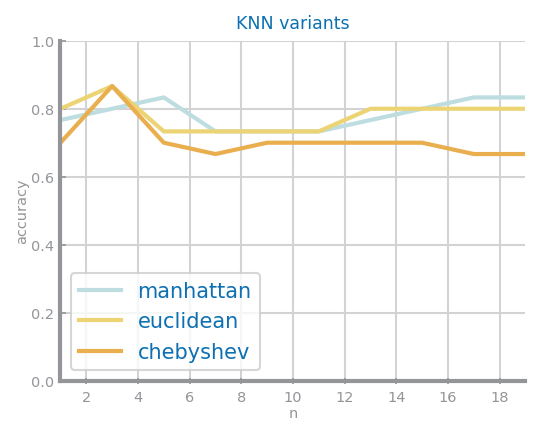

Best accuracy: 0.8666666666666667
Best results with 3 neighbors and euclidean


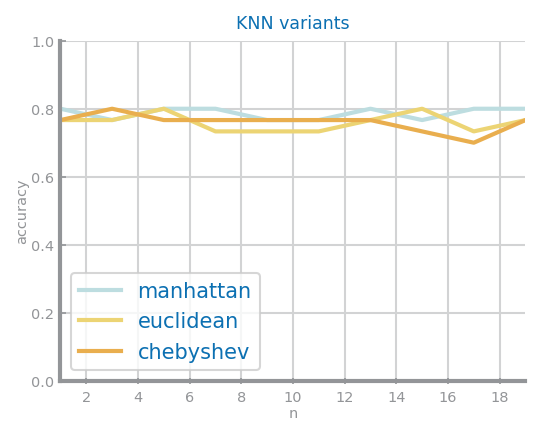

Best accuracy: 0.8
Best results with 1 neighbors and manhattan


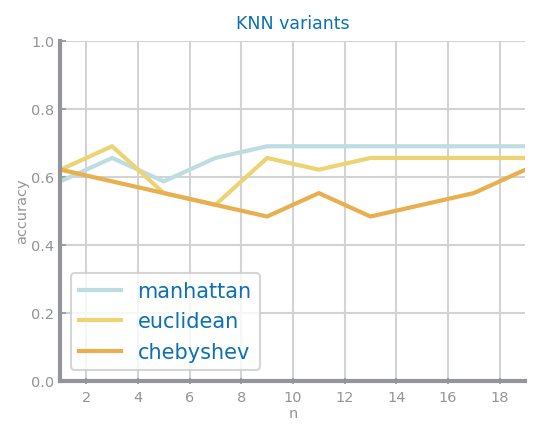

Best accuracy: 0.6896551724137931
Best results with 9 neighbors and manhattan


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsClassifier
import ds_functions as ds

for split in splits:
    nvalues = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
    dist = ['manhattan', 'euclidean', 'chebyshev']
    values = {}
    best = (0, '')
    last_best = 0
    for d in dist:
        yvalues = []
        for n in nvalues:
            knn = KNeighborsClassifier(n_neighbors=n, metric=d)
            knn.fit(split['X_train'], split['y_train'])
            prdY = knn.predict(split['X_test'])
            yvalues.append(metrics.accuracy_score(split['y_test'], prdY))
            if yvalues[-1] > last_best:
                best = (n, d)
                last_best = yvalues[-1]
        values[d] = yvalues
    plt.figure()
    ds.multiple_line_chart(nvalues, values, title='KNN variants', xlabel='n', ylabel='accuracy', percentage=True)
    plt.show()
    print("Best accuracy:", last_best)
    print('Best results with %d neighbors and %s'%(best[0], best[1]))

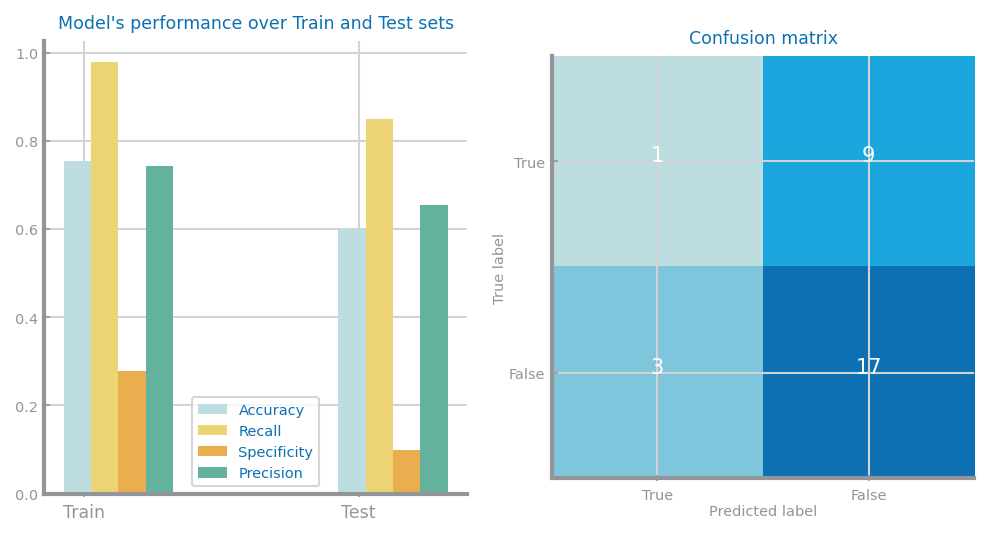

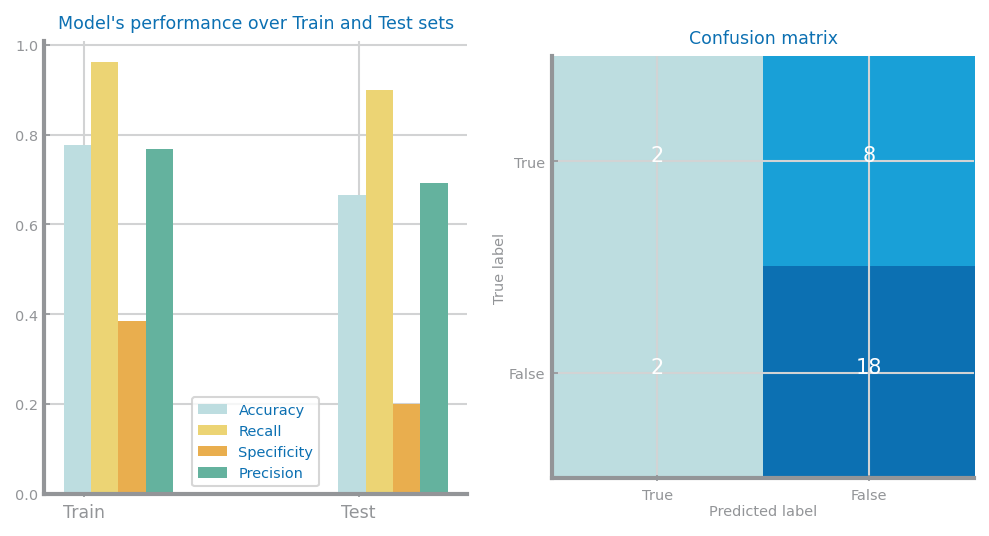

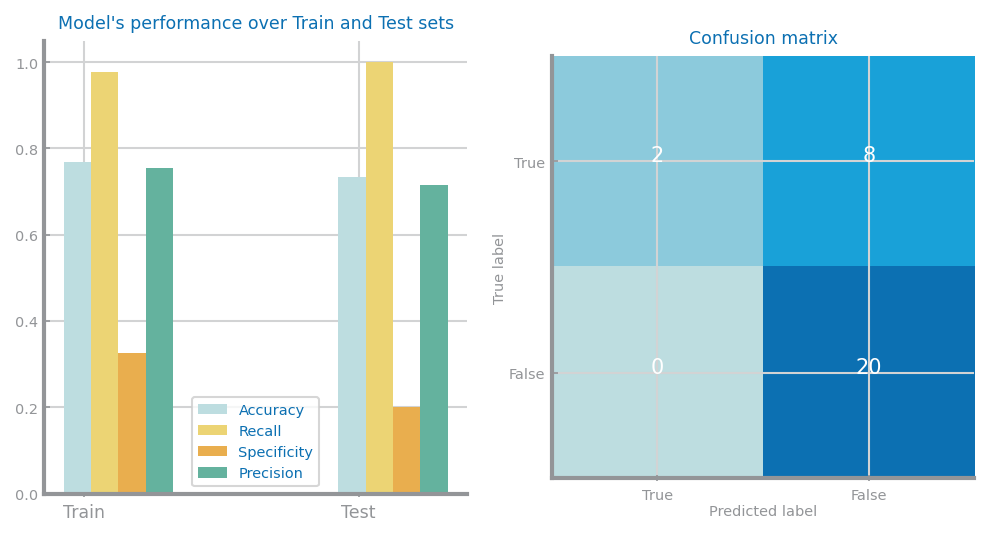

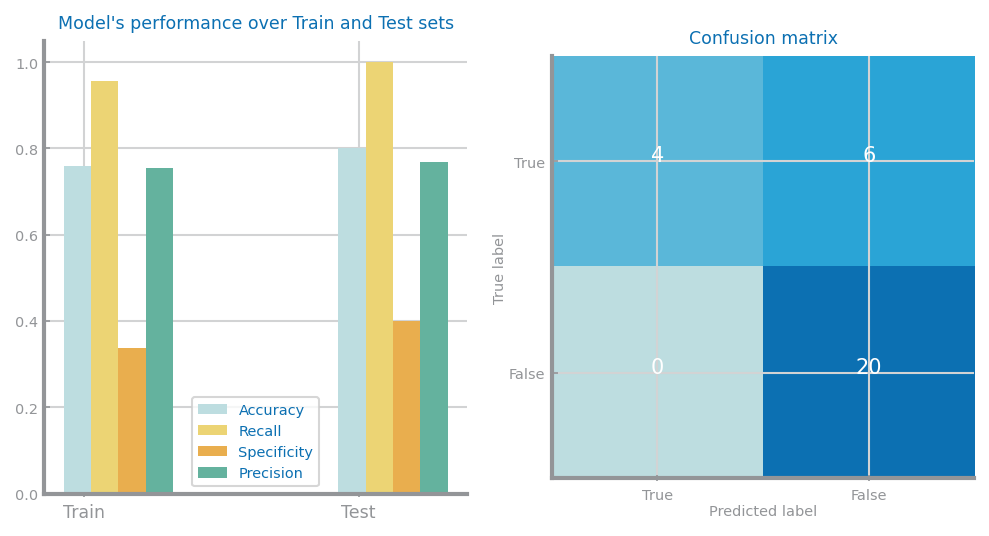

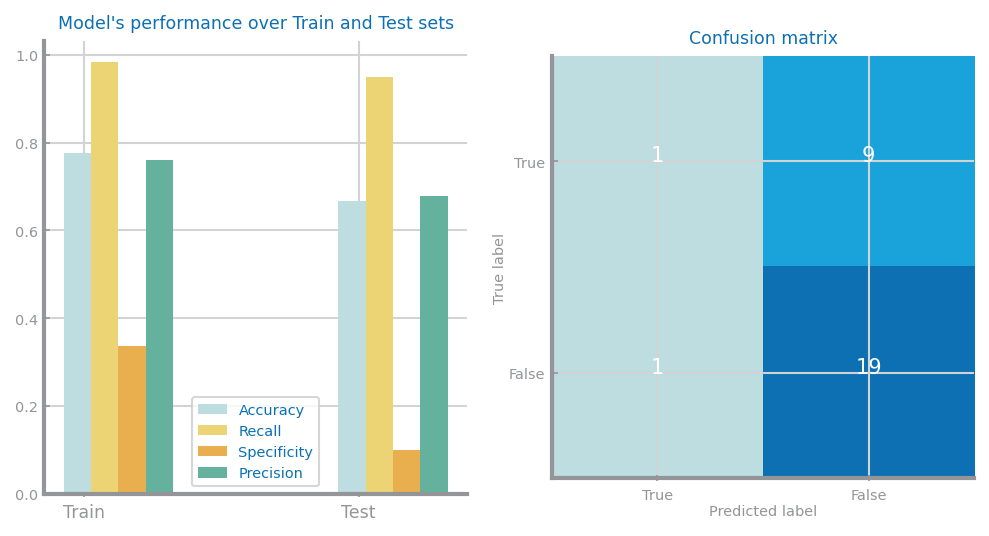

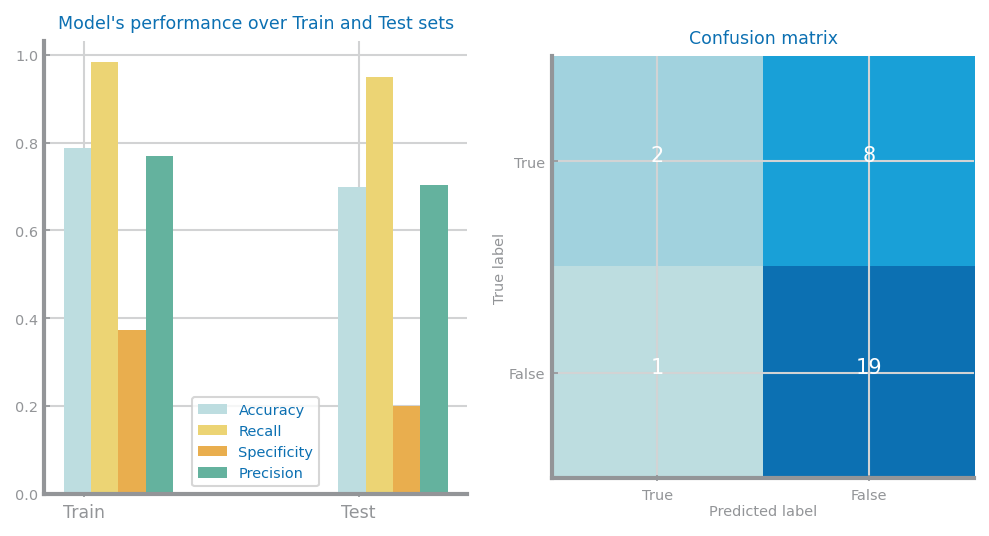

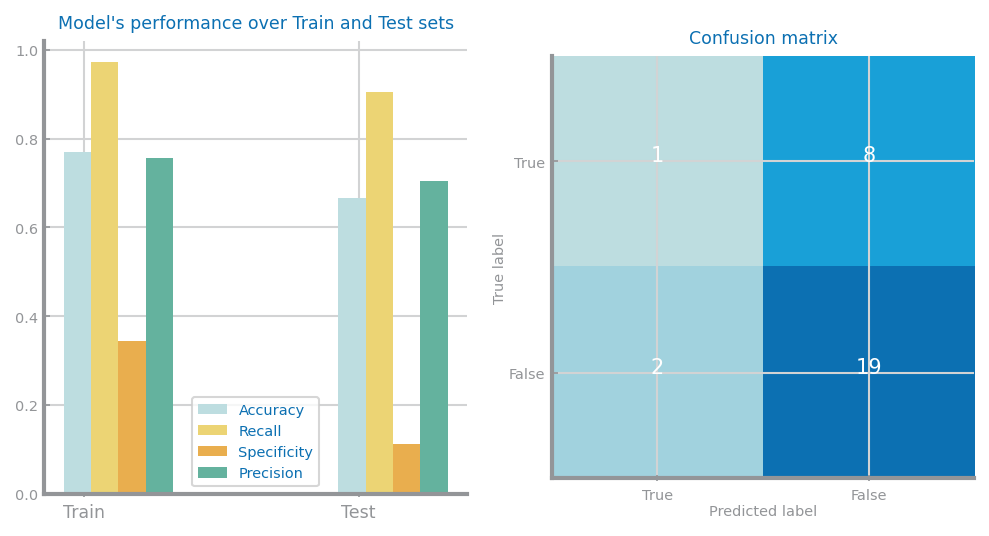

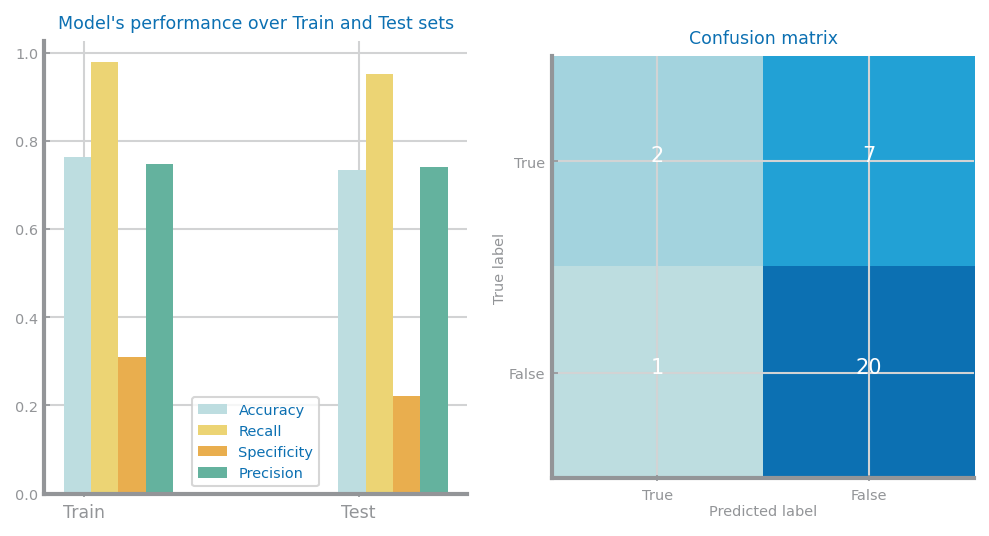

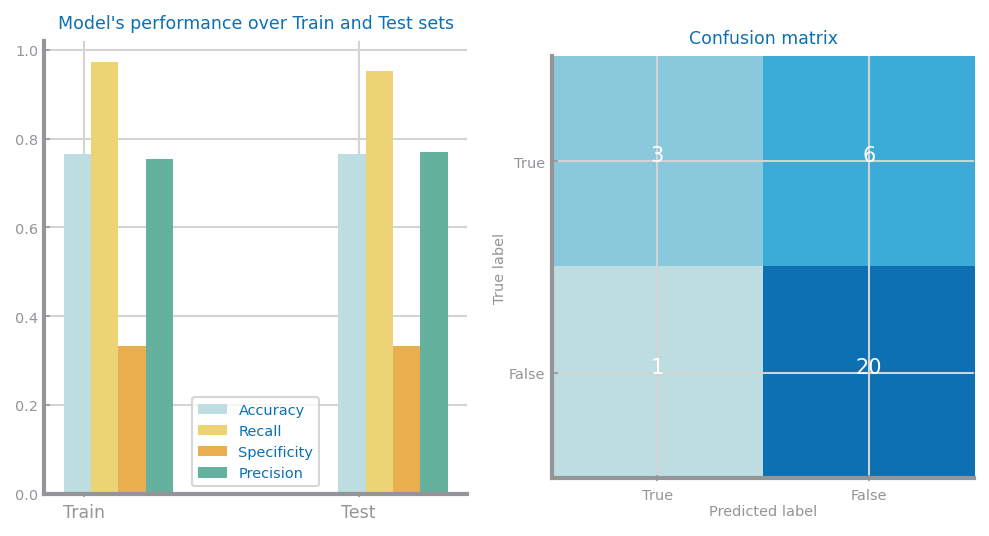

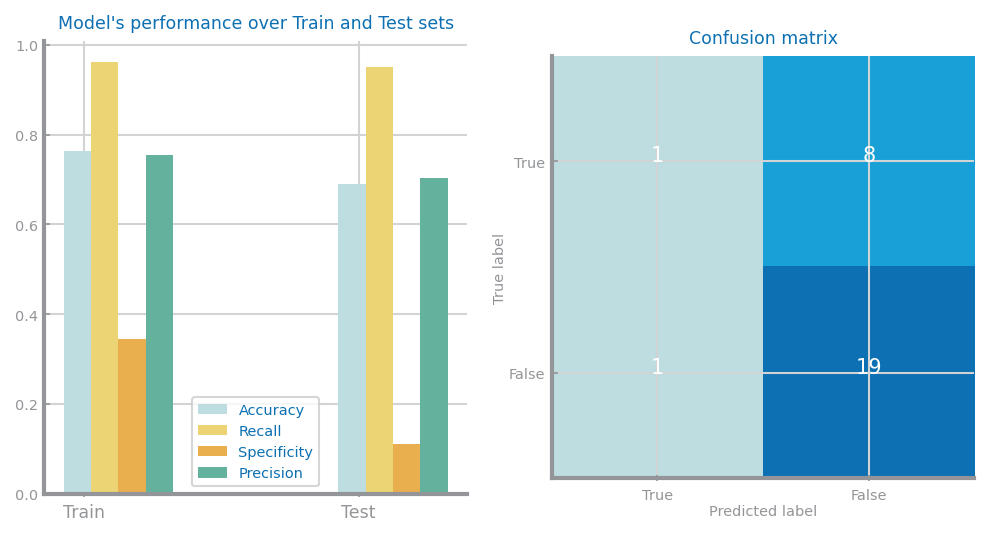

In [11]:
clf = KNeighborsClassifier(n_neighbors=best[0], metric=best[1])
for split in splits:
    clf.fit(split['X_train'], split['y_train'])
    prd_trn = clf.predict(split['X_train'])
    prd_tst = clf.predict(split['X_test'])
    ds.plot_evaluation_results([True, False], split['y_train'], prd_trn, split['y_test'], prd_tst, showXTickLabels=True)

### Summary

---

***How do models improve with the increase of neighbors?***

The impact of the number of neighbors in the in the results seems to depend on the split between train and test records. We could not reach any conclusion.

***How does performance changes with different distance measures?***

The Chebyshev measure doens't seem very appropriate for this dataset. It is almost always worse or similar to the other 2 in terms of performance (accuracy).
Manhattan and Euclidean measures are similar.

***What is the best parametrisation (number of neighbors and distance measure)?***

The best results (~0.833 accuracy) were shared between 3 of the splits. The number of neighbors was different on each of the parametrisations with the manhattan measure. With the euclidean measure, having 13 as the number of neighbours seemed to yield best results.

***Is the accuracy achieved good enough?***

The accuracy is better than the one of the classifier that considers every record is negative. However, this doesn't mean the classifier is good enough. We still consider it is not very good.

***What is the largest kind of errors?***

False negative.

***Is it possible to identify overfitting?***

In some of the splits, the model seems more adequate for the training set than for the test set. In others, it's the other way around. But the differences were not very significant, so we don't think it is possible to identify overfitting.

## 3.3. Decision Trees

---

<Figure size 600x450 with 0 Axes>

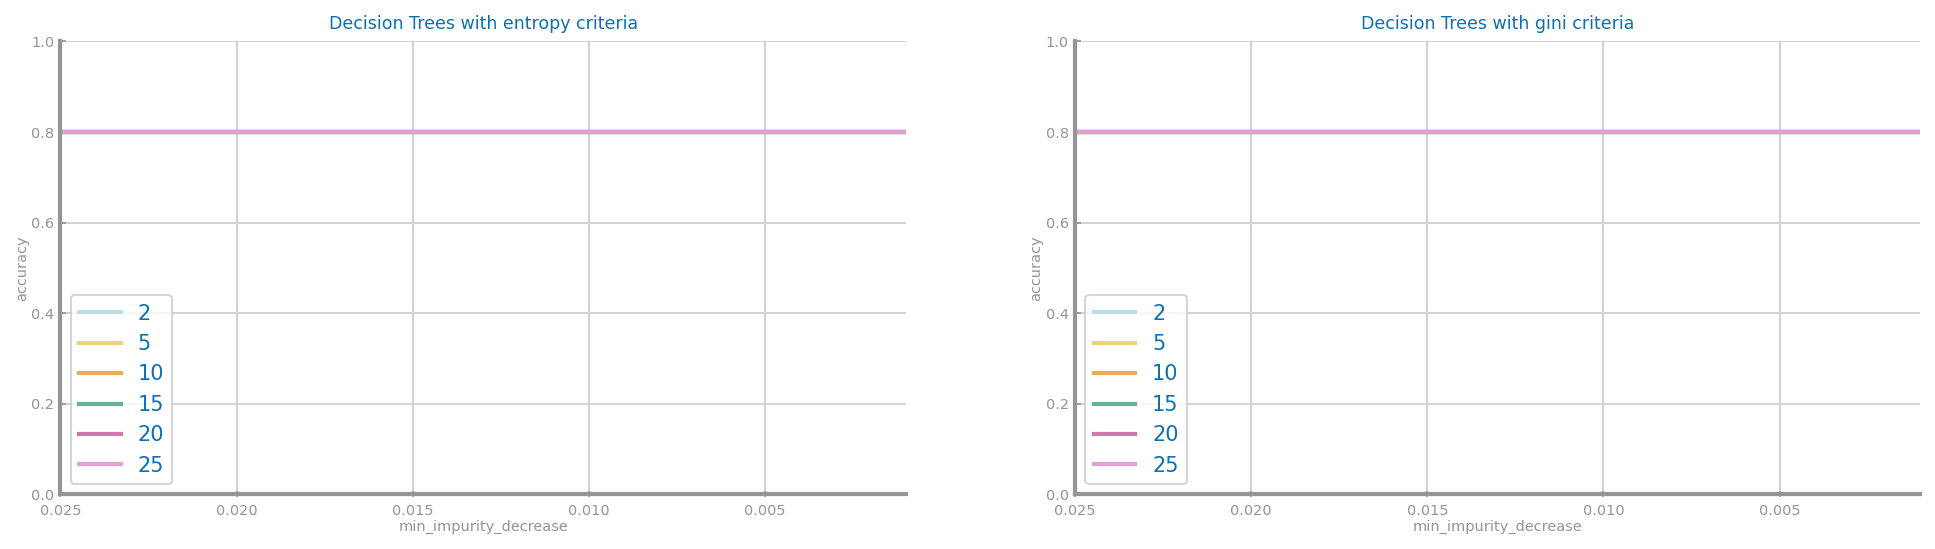

Best results achieved with entropy criteria, depth=2 and min_impurity_decrease=0.03 ==> accuracy=0.80


<Figure size 600x450 with 0 Axes>

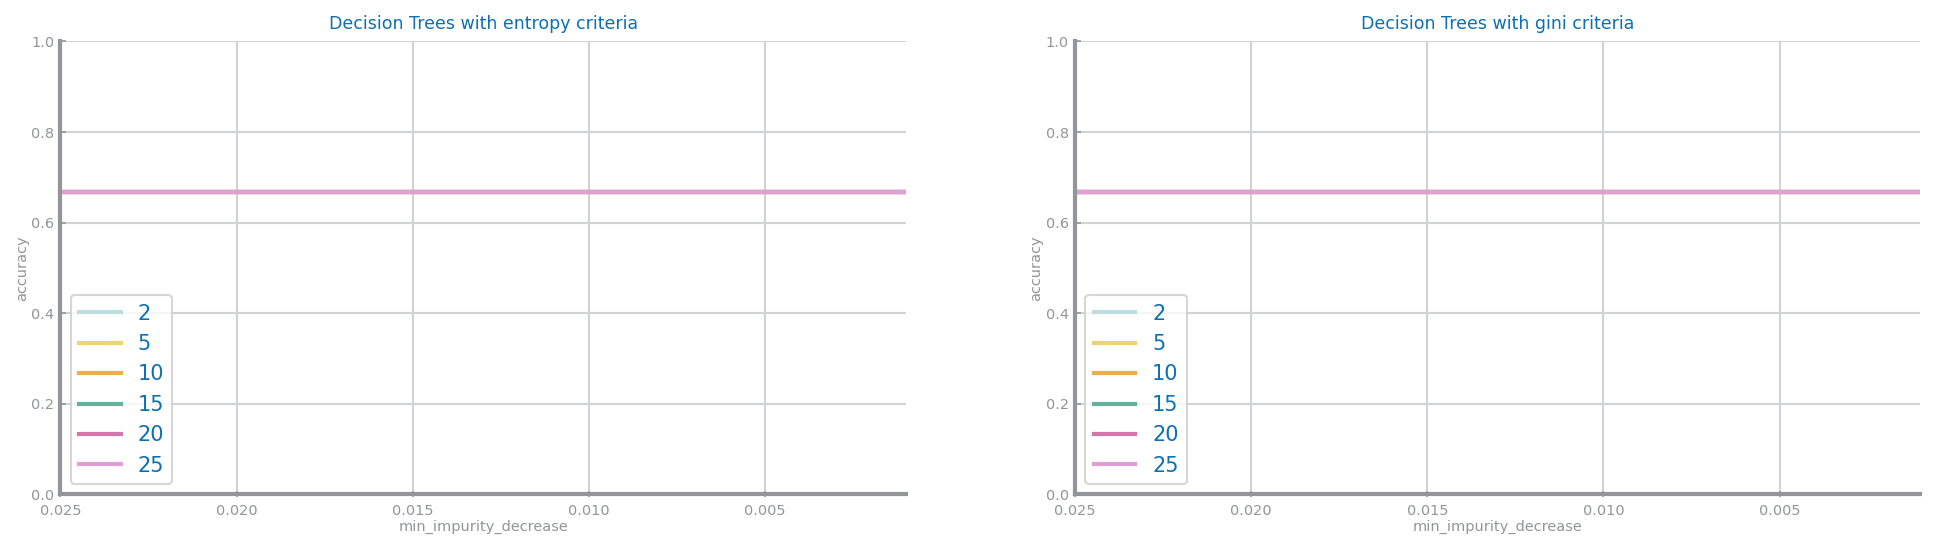

Best results achieved with entropy criteria, depth=2 and min_impurity_decrease=0.03 ==> accuracy=0.67


<Figure size 600x450 with 0 Axes>

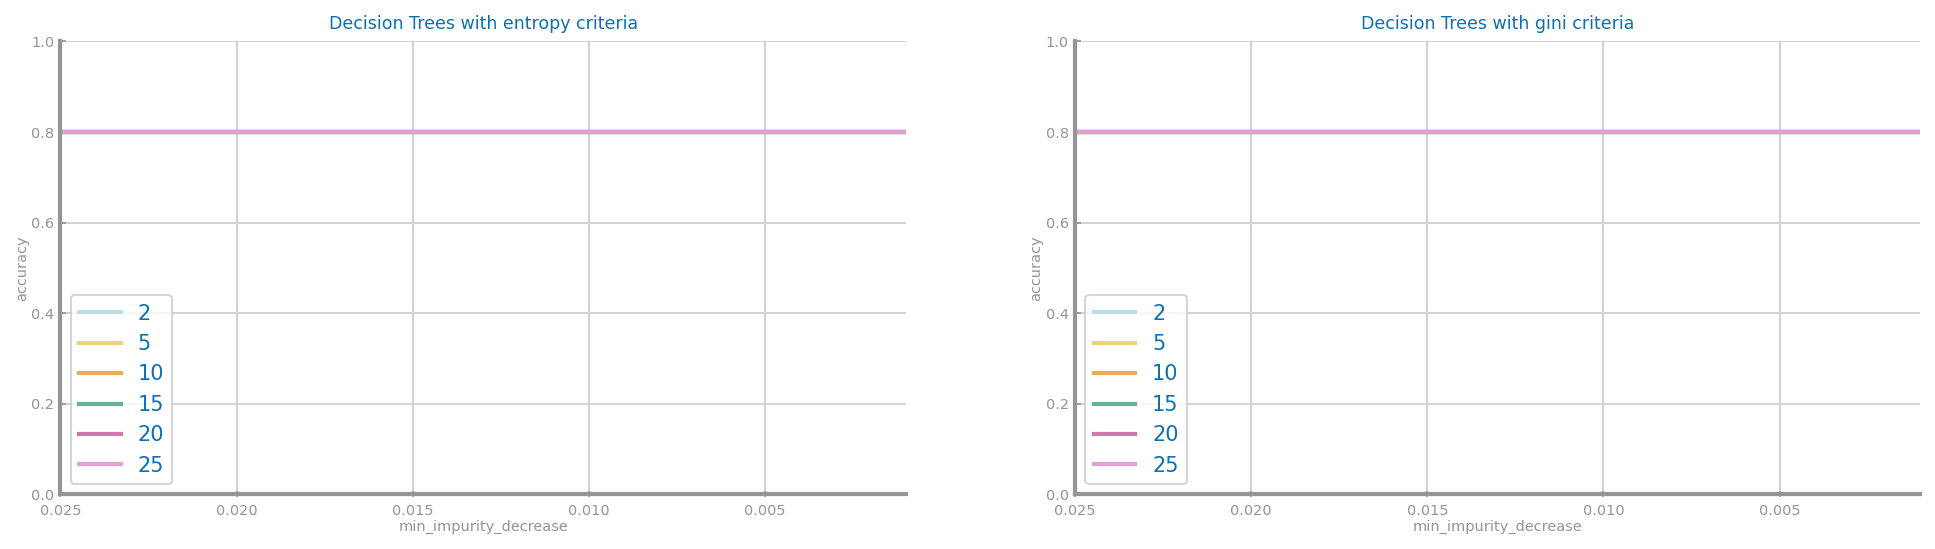

Best results achieved with entropy criteria, depth=2 and min_impurity_decrease=0.03 ==> accuracy=0.80


<Figure size 600x450 with 0 Axes>

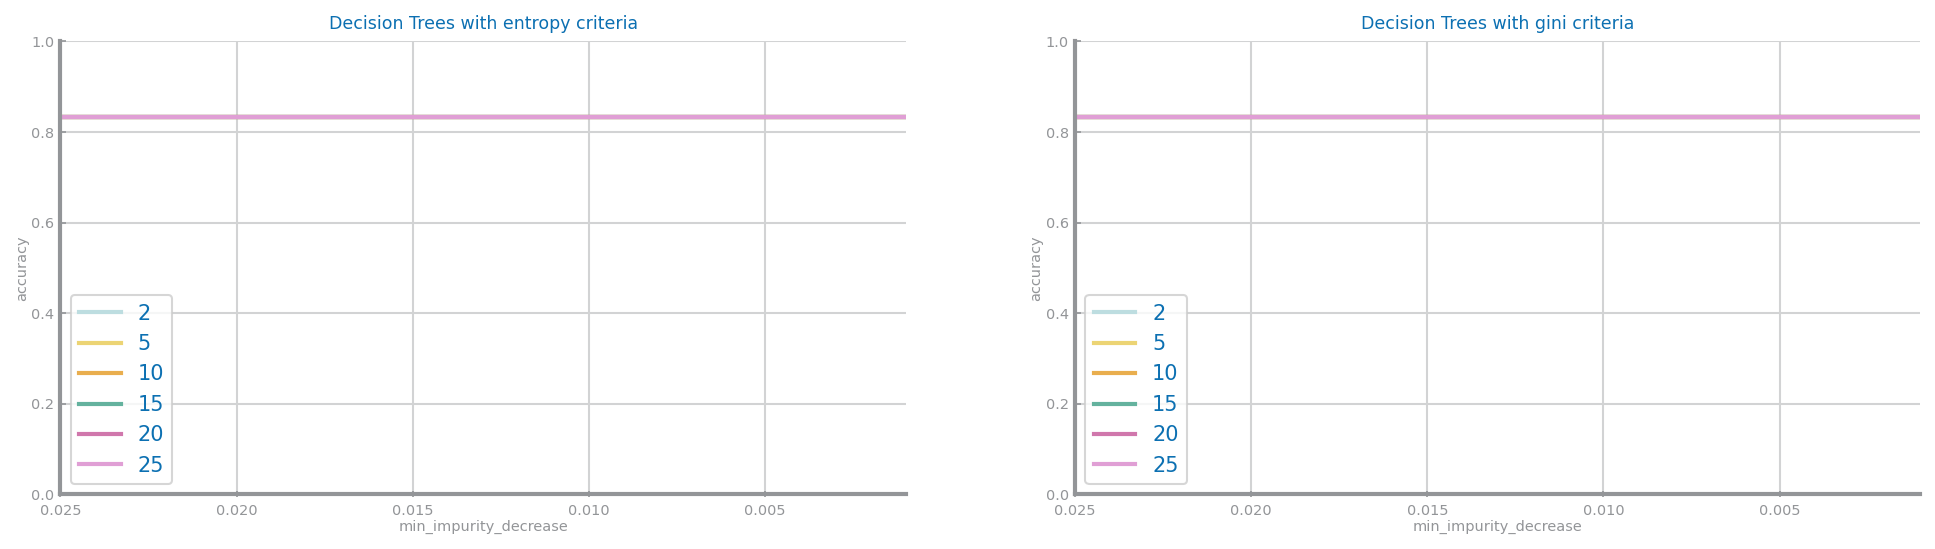

Best results achieved with entropy criteria, depth=2 and min_impurity_decrease=0.03 ==> accuracy=0.83


<Figure size 600x450 with 0 Axes>

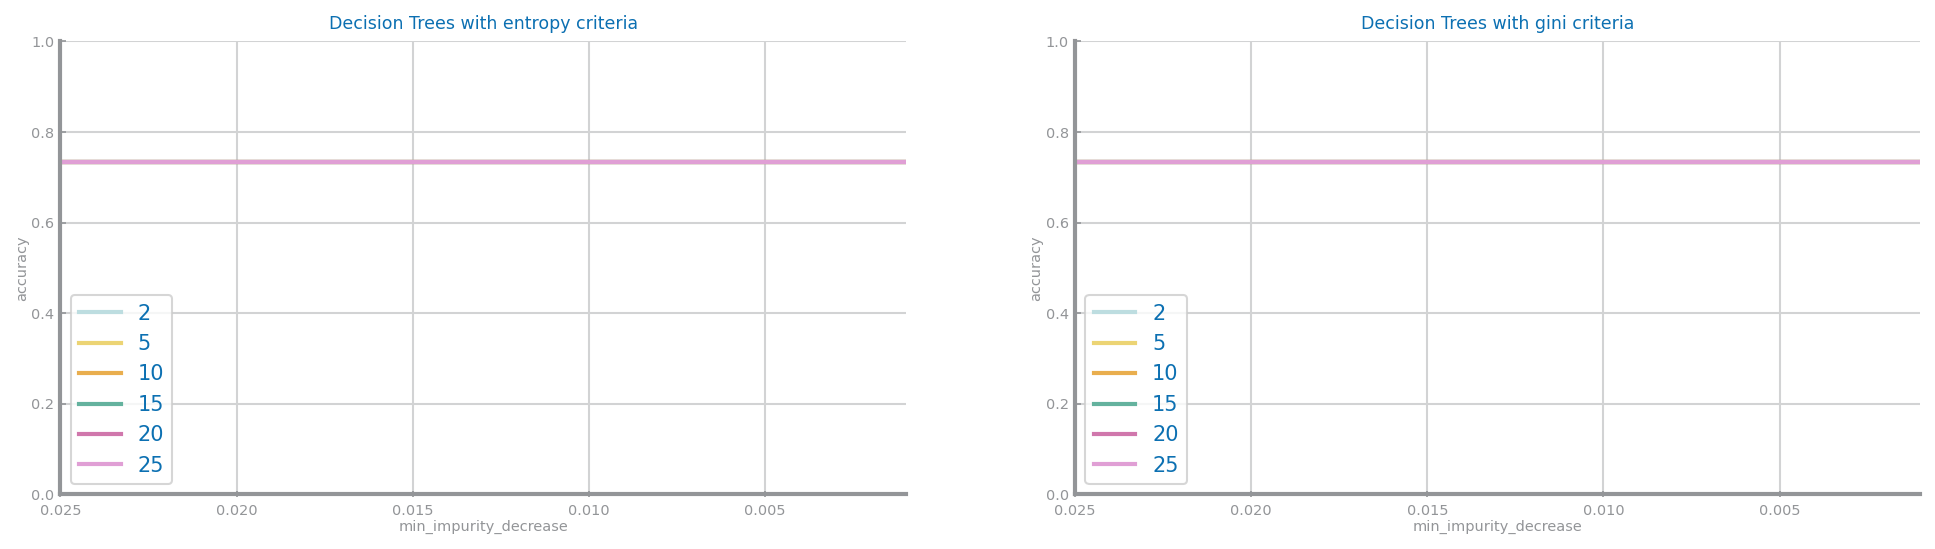

Best results achieved with entropy criteria, depth=2 and min_impurity_decrease=0.03 ==> accuracy=0.73


<Figure size 600x450 with 0 Axes>

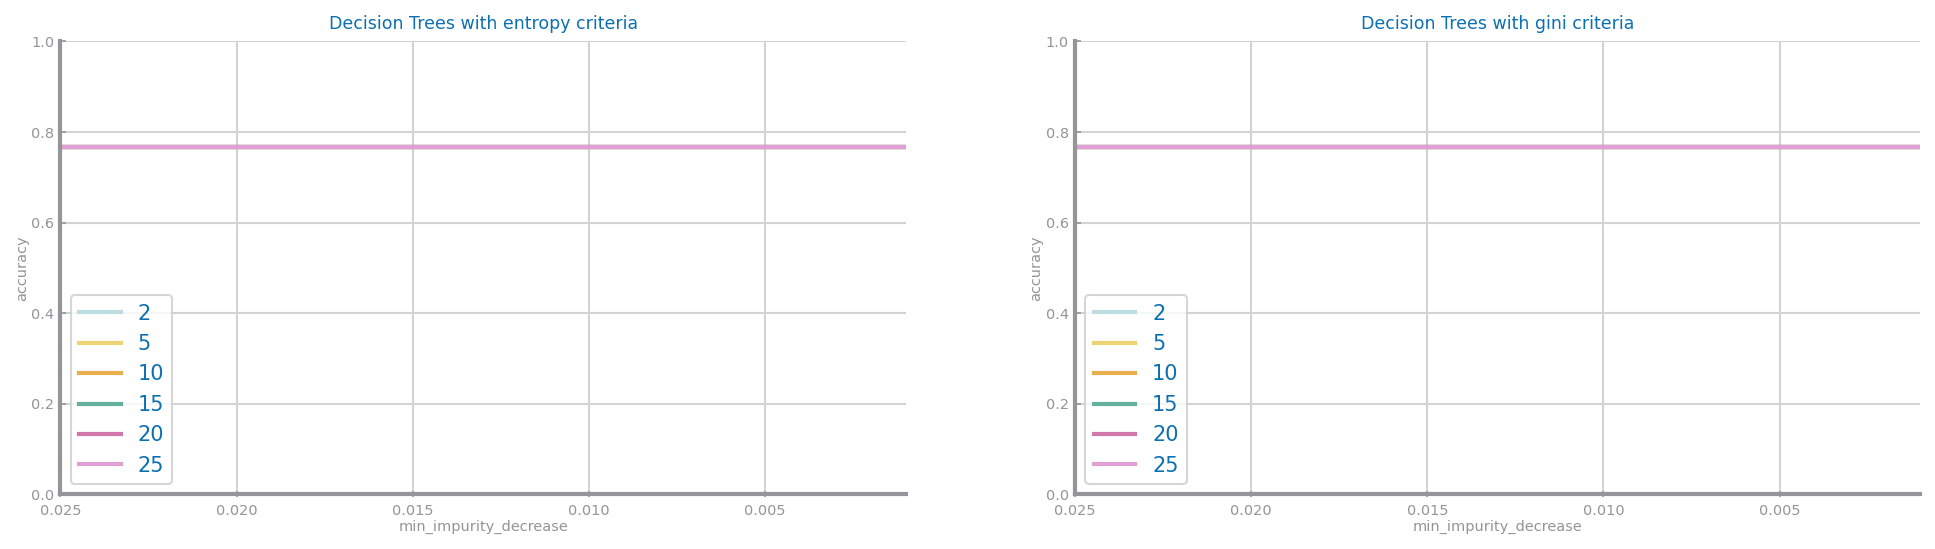

Best results achieved with entropy criteria, depth=2 and min_impurity_decrease=0.03 ==> accuracy=0.77


<Figure size 600x450 with 0 Axes>

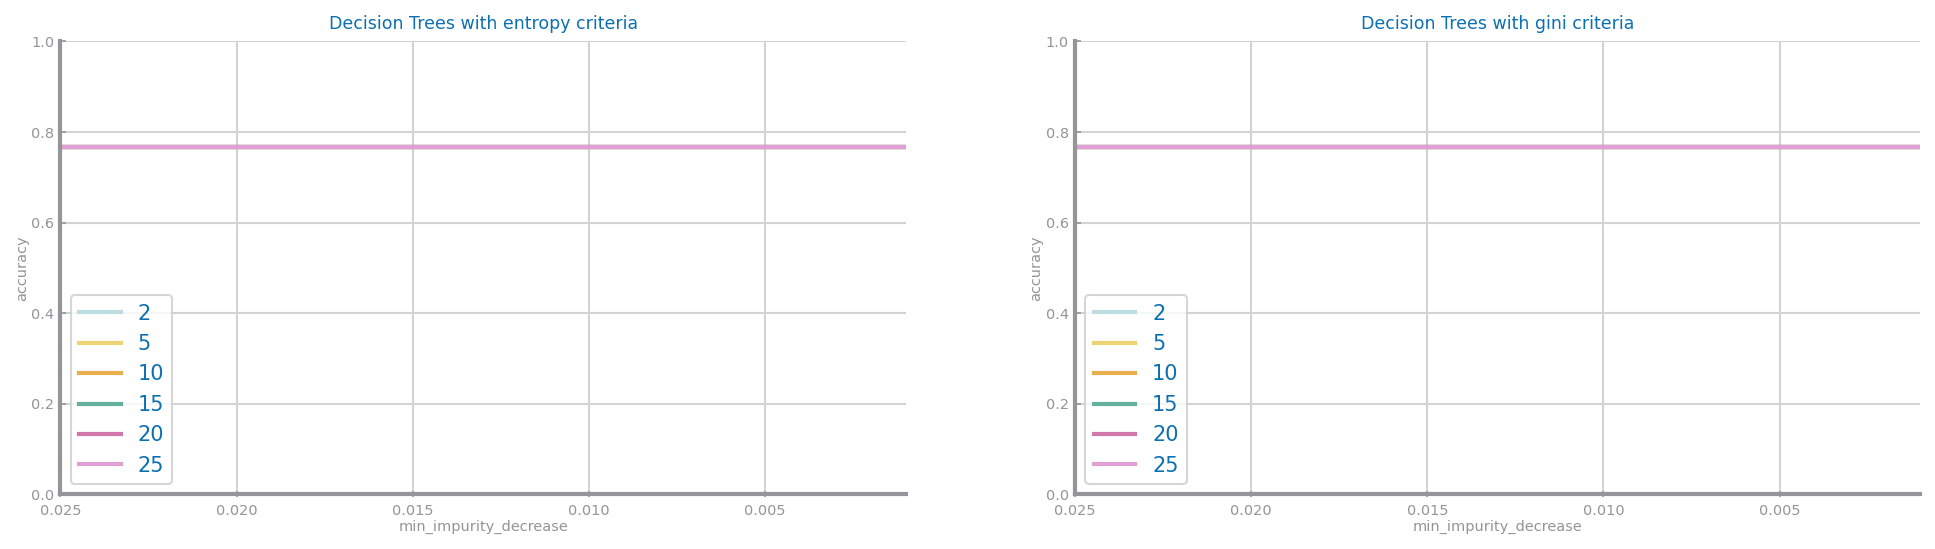

Best results achieved with entropy criteria, depth=2 and min_impurity_decrease=0.03 ==> accuracy=0.77


<Figure size 600x450 with 0 Axes>

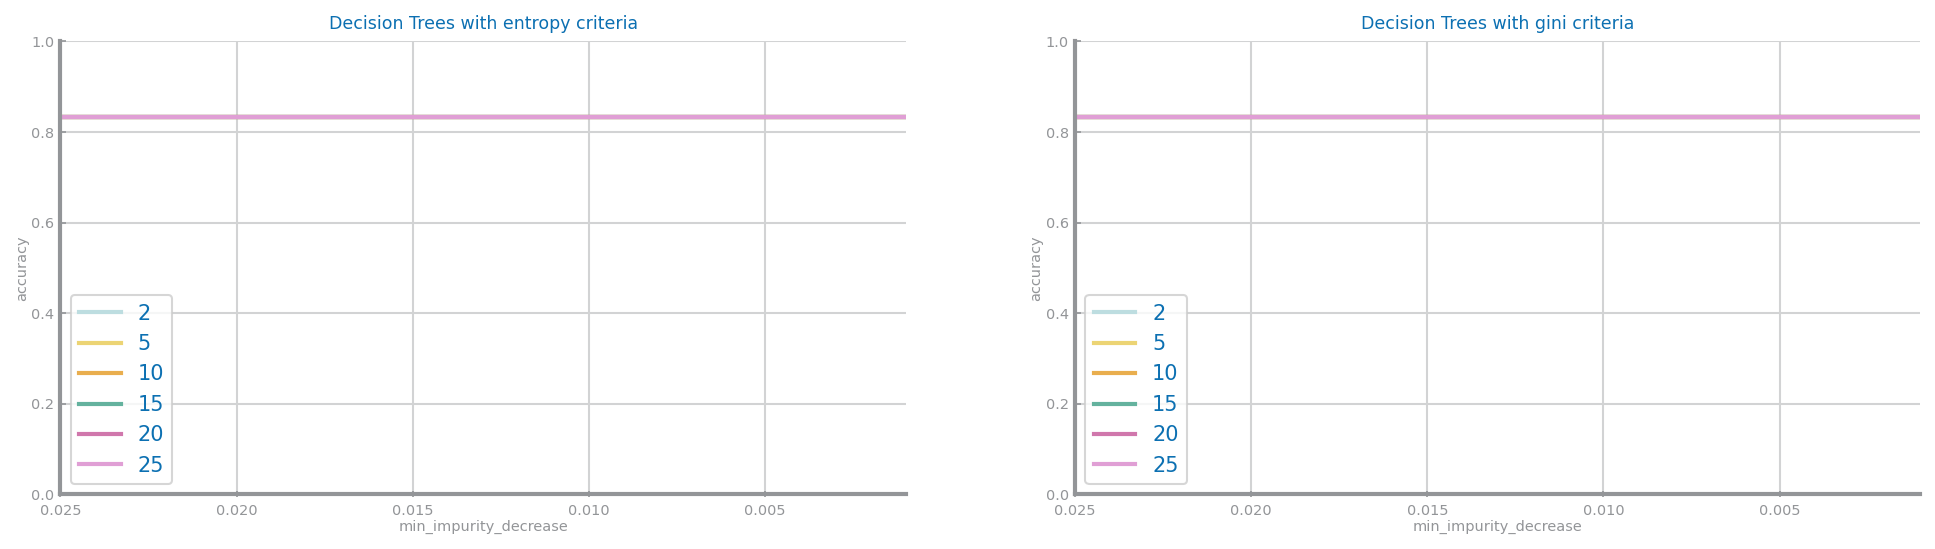

Best results achieved with entropy criteria, depth=2 and min_impurity_decrease=0.03 ==> accuracy=0.83


<Figure size 600x450 with 0 Axes>

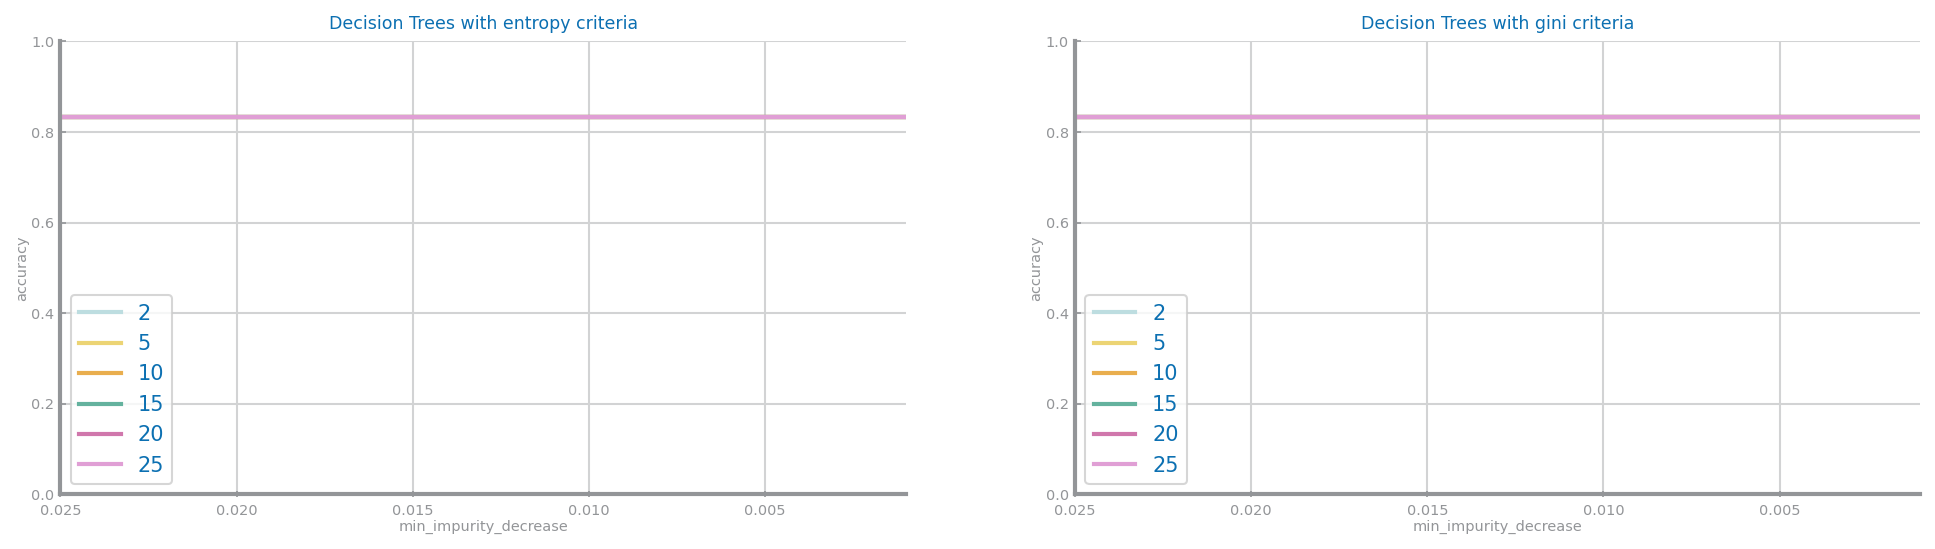

Best results achieved with entropy criteria, depth=2 and min_impurity_decrease=0.03 ==> accuracy=0.83


<Figure size 600x450 with 0 Axes>

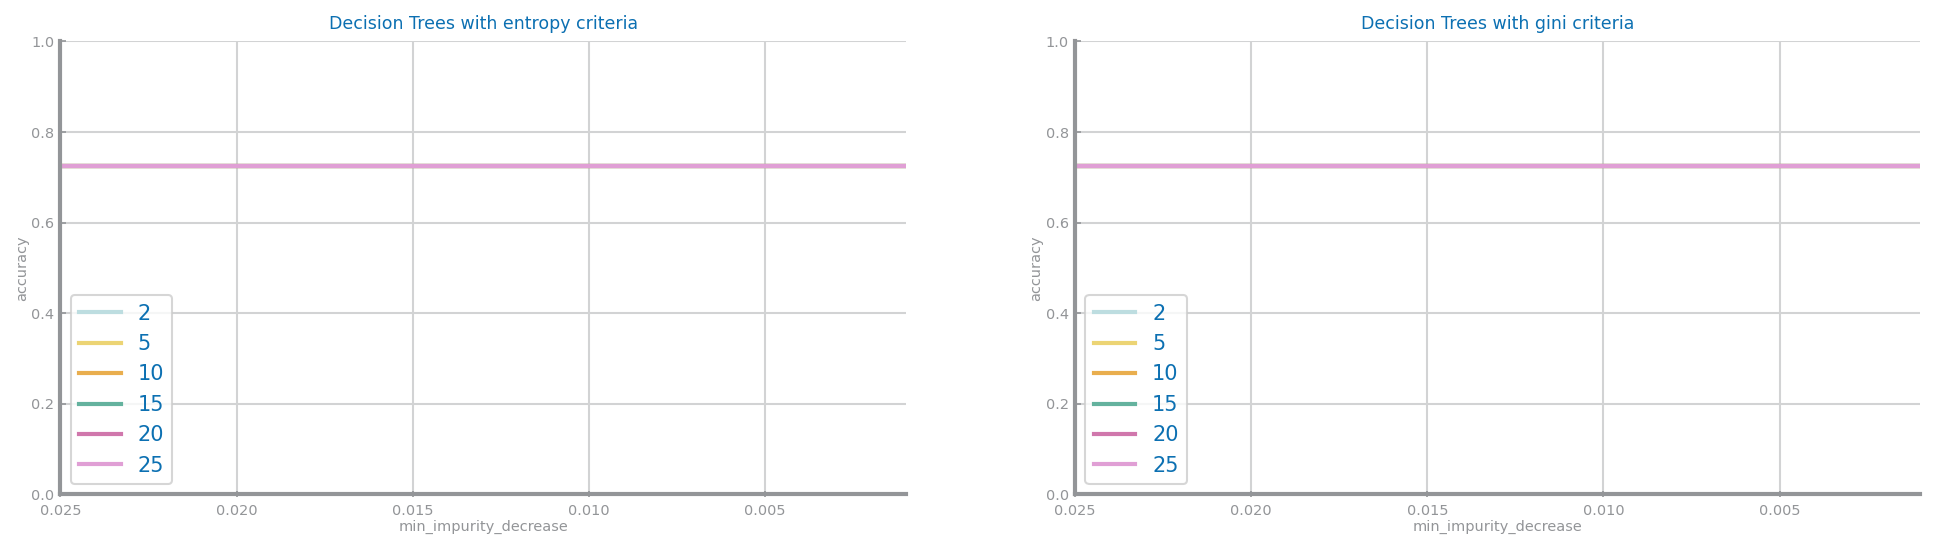

Best results achieved with entropy criteria, depth=2 and min_impurity_decrease=0.03 ==> accuracy=0.72


In [12]:
from sklearn.tree import DecisionTreeClassifier

# TODO: escala nao deixa ver as linhas todas correct it

min_impurity_decrease = [0.025, 0.01, 0.005, 0.0025, 0.001]
max_depths = [2, 5, 10, 15, 20, 25]
criteria = ['entropy', 'gini']
best = ('',  0, 0.0)
best_tree = []

for split in splits:
    plt.figure()
    fig, axs = plt.subplots(1, 2, figsize=(16, 4), squeeze=False)
    best = ('',  0, 0.0)
    last_best = 0
    for k in range(len(criteria)):
        f = criteria[k]
        values = {}
        for d in max_depths:
            yvalues = []
            for imp in min_impurity_decrease:
                tree = DecisionTreeClassifier(min_samples_leaf=n, max_depth=d, criterion=f, min_impurity_decrease=imp)
                tree.fit(split['X_train'], split['y_train'])
                prdY = tree.predict(split['X_test'])
                yvalues.append(metrics.accuracy_score(split['y_test'], split['prdY']))
                if yvalues[-1] > last_best:
                    best = (f, d, imp)
                    last_best = yvalues[-1]
                    best_tree.append(tree)

            values[d] = yvalues
        ds.multiple_line_chart(min_impurity_decrease, values, ax=axs[0, k], title='Decision Trees with %s criteria'%f,
                           xlabel='min_impurity_decrease', ylabel='accuracy', percentage=True)

    plt.show()
    print('Best results achieved with %s criteria, depth=%d and min_impurity_decrease=%1.2f ==> accuracy=%1.2f'%(best[0], best[1], best[2], last_best))

Decision Tree for split 0


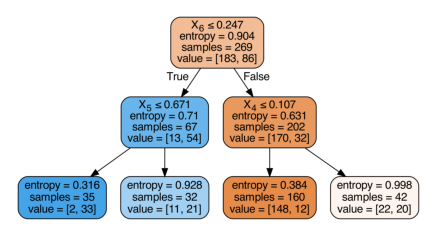

Decision Tree for split 1


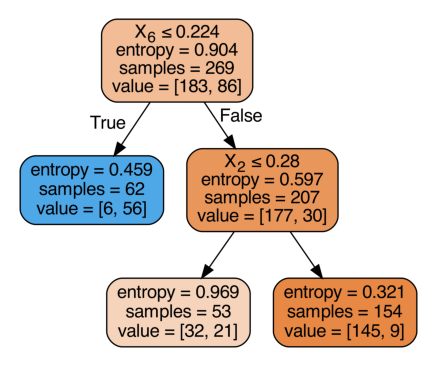

Decision Tree for split 2


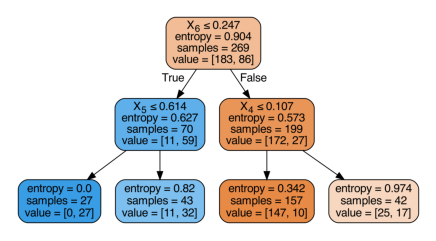

Decision Tree for split 3


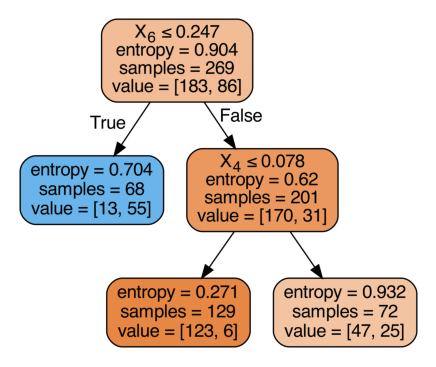

Decision Tree for split 4


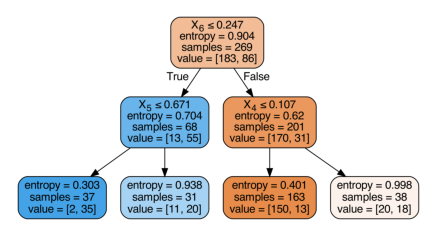

Decision Tree for split 5


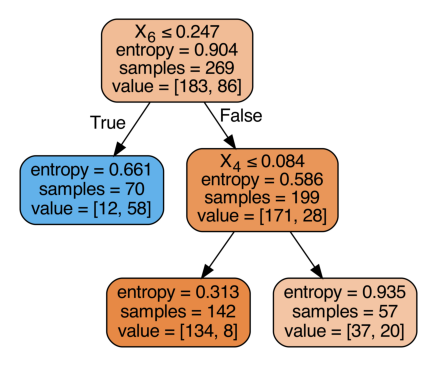

Decision Tree for split 6


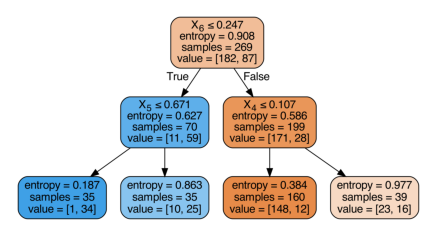

Decision Tree for split 7


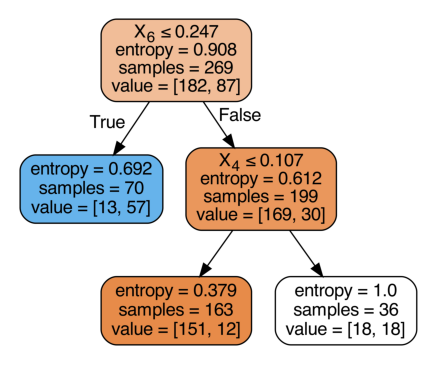

Decision Tree for split 8


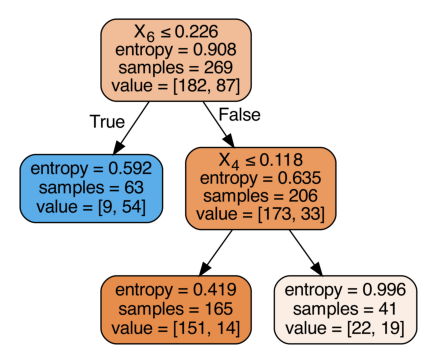

Decision Tree for split 9


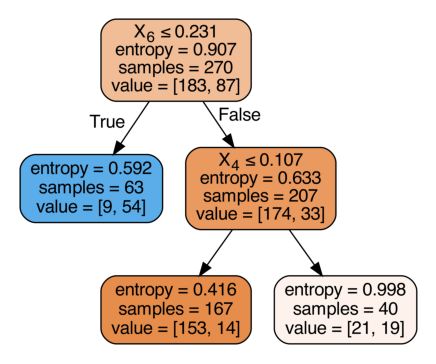

In [13]:
from sklearn.tree import export_graphviz
from subprocess import call

for i in range(len(best_tree)):
    dot_data = export_graphviz(best_tree[i], out_file='dtree.dot', filled=True, rounded=True, special_characters=True)
    # Convert to png
    call(['dot', '-Tpng', 'dtree.dot', '-o', 'dtree.png', '-Gdpi=600'])
    print('Decision Tree for split %s'%i)
    plt.figure(figsize = (3.5, 4.5))
    plt.imshow(plt.imread('dtree.png'))
    plt.axis('off')
    plt.show()
    

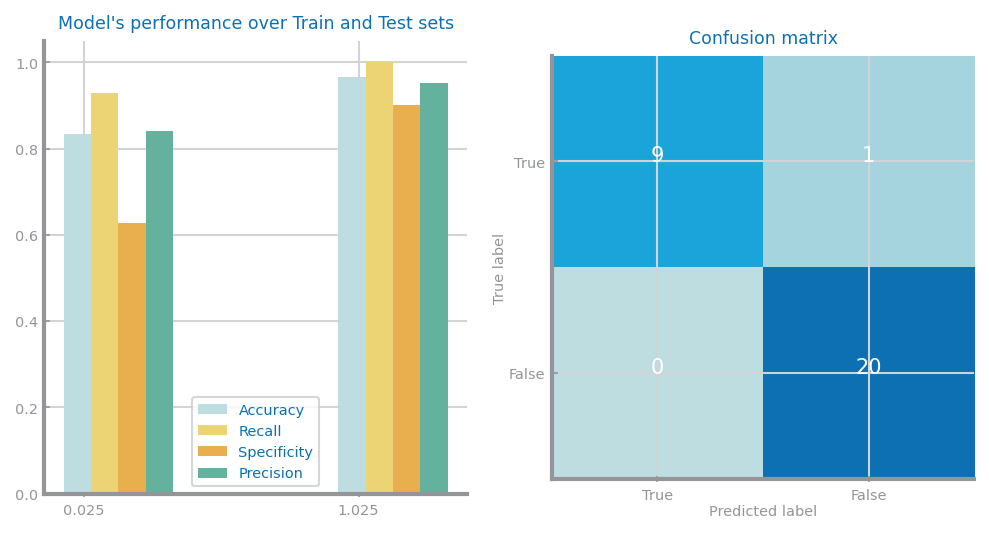

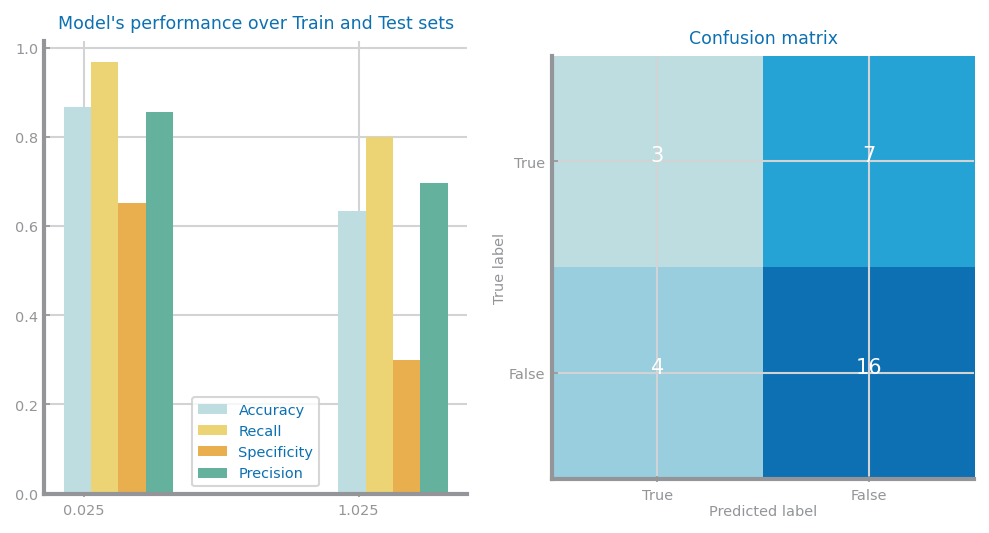

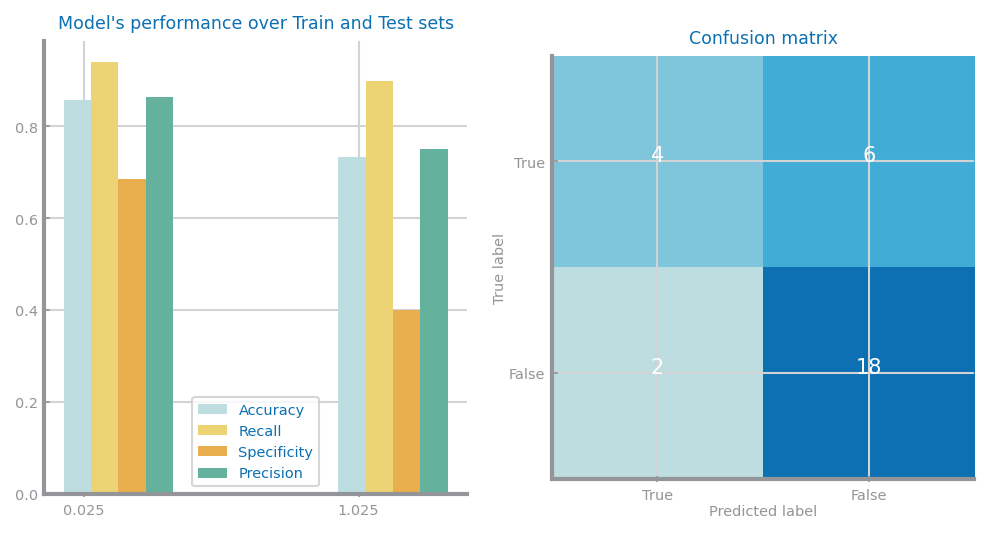

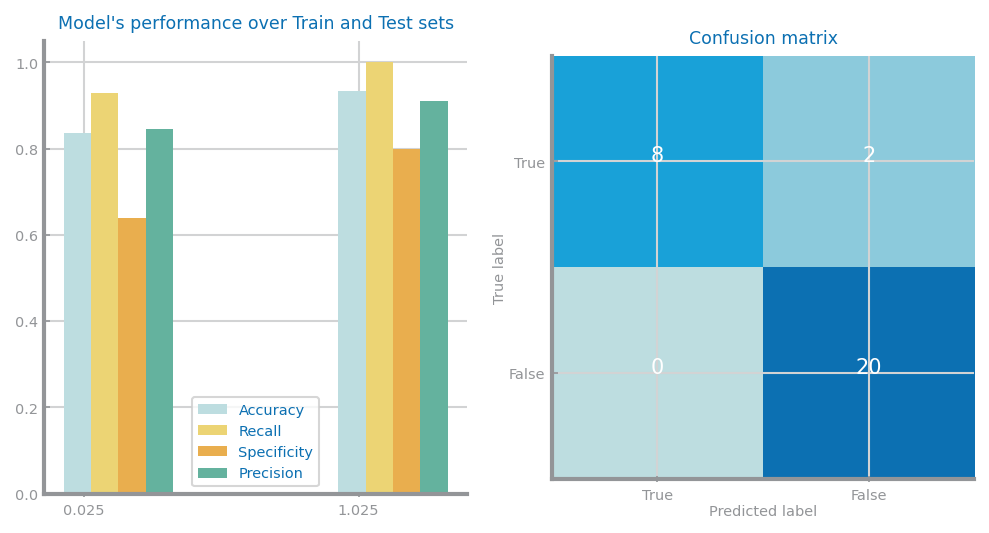

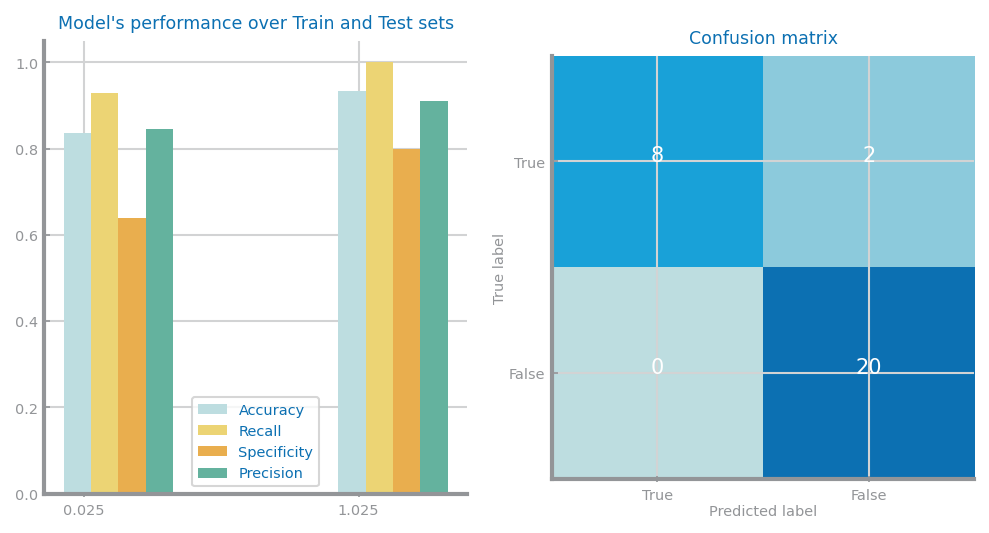

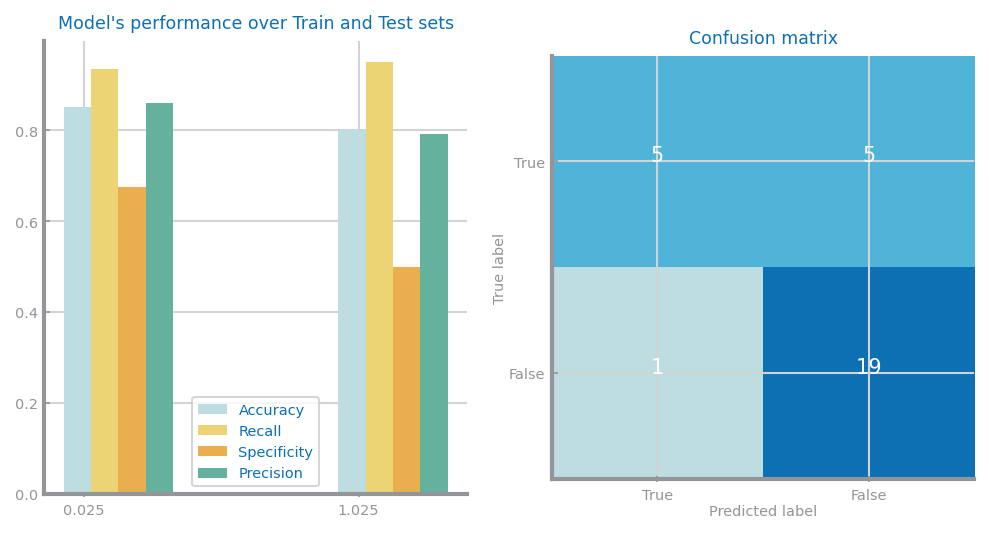

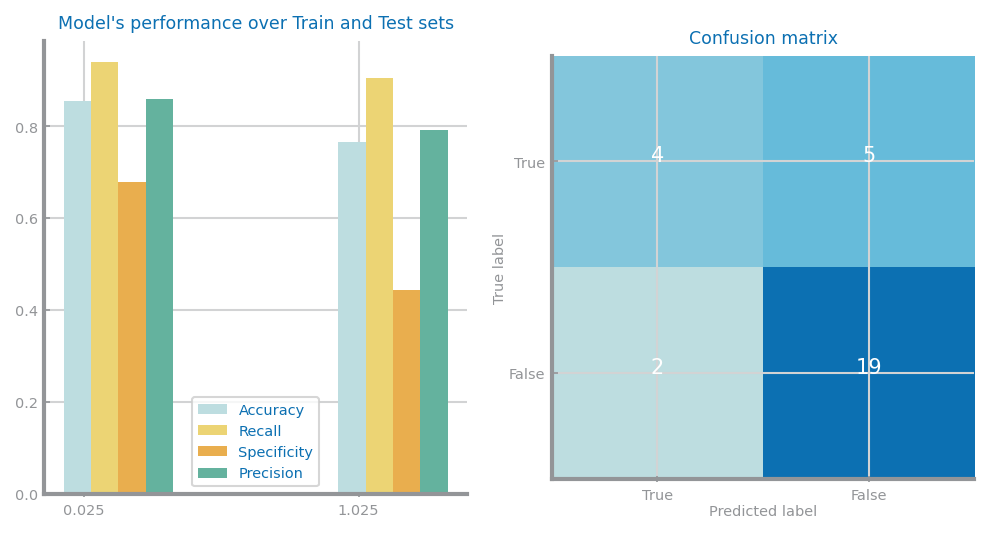

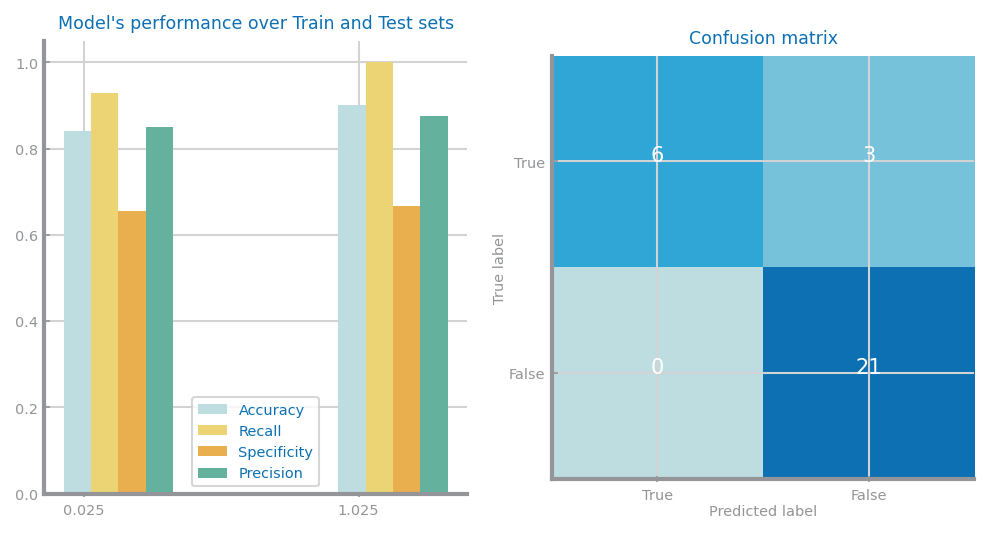

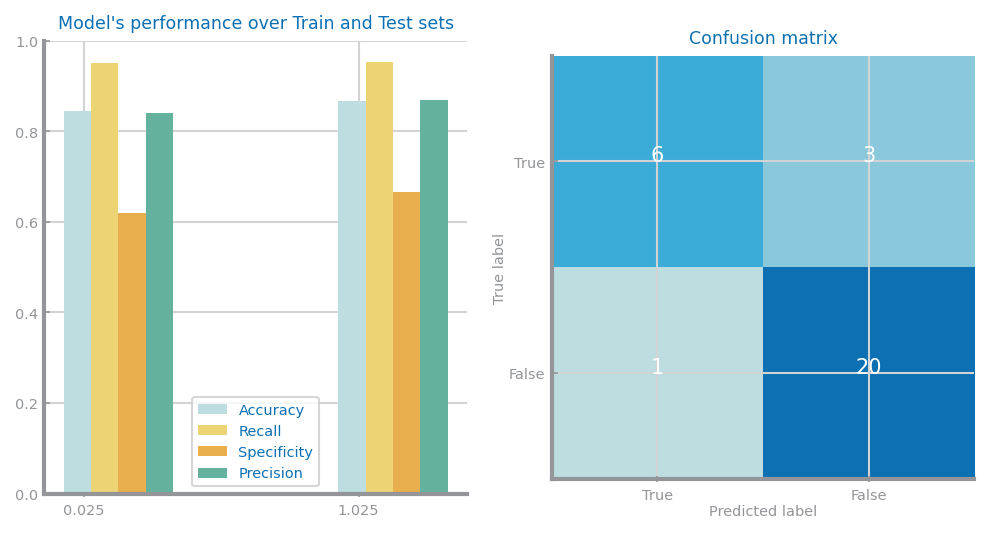

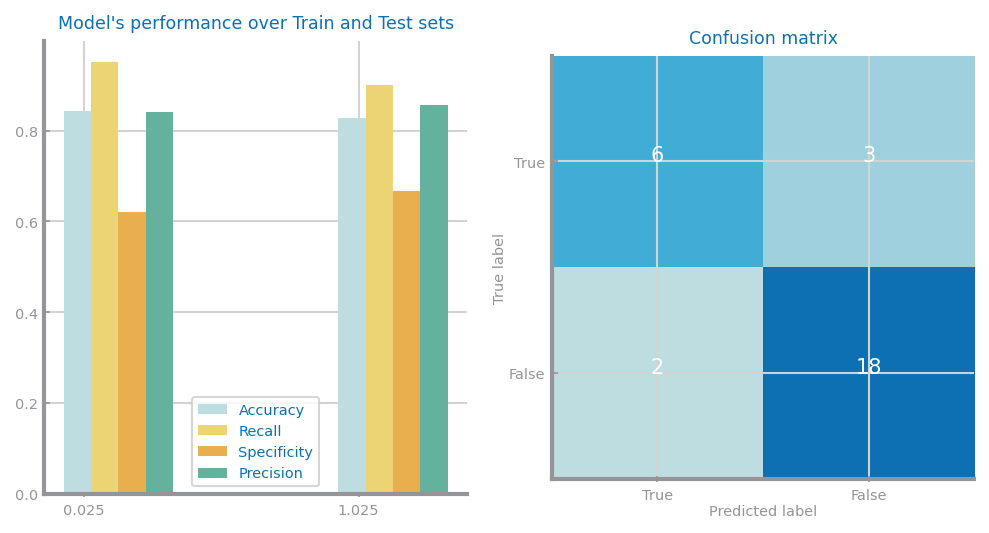

In [14]:
for i in range(len(best_tree)):  
    split = splits[i]
    prd_trn = best_tree[i].predict(split['X_train'])
    prd_tst = best_tree[i].predict(split['X_test'])
    ds.plot_evaluation_results(pd.unique(y), split['y_train'], prd_trn, split['y_test'], prd_tst)

### Summary
---

- *How do models improve with the increase of max_depth?*

#TODO

- *How does performance changes with decrease of min_impurity_decrease?*

#TODO

- *How do different criteria impact the model performance?*

#TODO

- *What is the best parametrisation (criteria, max_depth and min_impurity_decrease)?*

#TODO

- *Is the accuracy achieved good enough?*

#TODO

- *What is the largest kind of errors?*

#TODO

- *Is it possible to identify overfitting?*

#TODO